# Energy Prediction

## Problem Statement Overview:

Energy consumption patterns are vital for resource planning, optimizing utility management, and developing sustainable energy policies. Communities rely on accurate data about different energy sources, such as electricity and natural gas, to make informed decisions. However, predicting the type of energy being consumed based on regional, seasonal, and utility-based factors is challenging due to the diverse and complex interactions between these variables. By developing an effective classification model to predict the type of energy consumption, we can enhance energy planning efforts, improve infrastructure management, and promote efficient resource utilization across various communities.

## Objective:

To develop an accurate energy classification model using machine learning techniques, capable of predicting the type of energy (e.g., electricity, natural gas) consumed by a community based on features such as geographical location, utility data, seasonal variations, and consumption patterns. This model aims to enhance resource planning and optimize energy management efforts across different regions.

In [26]:
#Ignor warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description:

**Source:** The data is sourced from a utility-energy registry that tracks monthly community energy use starting from 2016. It includes information from various communities, utility companies, and energy types across different regions.

**Features:**

   * **year:** The year of data collection.
   * **data_class:** The type of energy (target variable), such as electricity or natural gas.
   * **month:** The month in which the data was recorded.
   * **value:** The energy consumption or production amount.
   * **com_name:** The name of the community.
   * **com_type:** The type of community (e.g., village, city).
   * **data_field:** The classification of the data, such as residential or total consumption.
   * **com_county:** The county where the community is located (some missing values).
   * **geometry_id**: A unique geographical identifier.
   * **full_fips:** The Federal Information Processing Standards code for the geographic location.
   * **unit:** The unit of measurement for energy consumption (e.g., MWh, Therms).
   * **uer_id:** A unique identifier for each record.
   * **data_stream:** The source of the data (e.g., community monthly data).
   * **utility_display_name:** The name of the utility company providing the energy data.
   * **number_of_accounts:** The number of energy accounts in the community (has missing values).
   * **Georeference:** The geographical coordinates of the community.


## Data collection

In [28]:
df = pd.read_csv('utility-energy-registry-monthly-community-energy-use-beginning-2016-1.csv')

In [29]:
df.head()

,year,data_class,month,value,com_name,com_type,data_field,com_county,geometry_id,full_fips,unit,uer_id,data_stream,utility_display_name,number_of_accounts,Georeference
0,2017,electricity,8,804.812,Sodus,Village,all_other_(o),Wayne,3668209,3668209,MWh,9,community_monthly,RG&E,37.0,POINT (-77.061462 43.236085)
1,2016,natural_gas,5,-999.000,Sodus,Village,all_other_(o),Wayne,3668209,3668209,Therms,9,community_monthly,RG&E,121.0,POINT (-77.061462 43.236085)
2,2017,natural_gas,6,7039.000,Spencer,Village,residential_(r),Tioga,3670167,3670167,Therms,6,community_monthly,NYSEG,182.0,POINT (-76.492961 42.217112)
3,2019,electricity,6,753.996,Sodus,Village,all_other_(o),Wayne,3668209,3668209,MWh,6,community_monthly,NYSEG,37.0,POINT (-77.061462 43.236085)
4,2017,natural_gas,10,335498.000,Southampton,Village,total_(t),Suffolk,3668462,3668462,Therms,5,community_monthly,National Grid,2612.0,POINT (-72.389644 40.887045)


## EDA (Exploratory Data Analysis)

### Check the shape of the Dataset

In [30]:
df['value']

0            804.812
1           -999.000
2           7039.000
3            753.996
4         335498.000
             ...    
867261      -999.000
867262        14.000
867263         3.080
867264       827.000
867265     25563.000
Name: value, Length: 867266, dtype: float64

In [31]:
df.shape

(867266, 16)

There are 867266 rows and 16 columns in the dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867266 entries, 0 to 867265
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  867266 non-null  int64  
 1   data_class            867266 non-null  object 
 2   month                 867266 non-null  int64  
 3   value                 867266 non-null  float64
 4   com_name              867266 non-null  object 
 5   com_type              867266 non-null  object 
 6   data_field            867266 non-null  object 
 7   com_county            847106 non-null  object 
 8   geometry_id           867266 non-null  int64  
 9   full_fips             867266 non-null  int64  
 10  unit                  867266 non-null  object 
 11  uer_id                867266 non-null  int64  
 12  data_stream           867266 non-null  object 
 13  utility_display_name  867266 non-null  object 
 14  number_of_accounts    706313 non-null  float64
 15  

In [33]:
df.columns

Index(['year', 'data_class', 'month', 'value', 'com_name', 'com_type',
       'data_field', 'com_county', 'geometry_id', 'full_fips', 'unit',
       'uer_id', 'data_stream', 'utility_display_name', 'number_of_accounts',
       'Georeference'],
      dtype='object')

### Identify numerical and categorical columns

In [34]:
#Numerical columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['year', 'month', 'value', 'geometry_id', 'full_fips', 'uer_id',
       'number_of_accounts'],
      dtype='object')

In [35]:
#categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['data_class', 'com_name', 'com_type', 'data_field', 'com_county',
       'unit', 'data_stream', 'utility_display_name', 'Georeference'],
      dtype='object')

After the finding out of 16 columns, 7 are numerical and 9 are categorical

### Checking null values

In [36]:
df.isnull().sum()

year                         0
data_class                   0
month                        0
value                        0
com_name                     0
com_type                     0
data_field                   0
com_county               20160
geometry_id                  0
full_fips                    0
unit                         0
uer_id                       0
data_stream                  0
utility_display_name         0
number_of_accounts      160953
Georeference                 0
dtype: int64

There 2 columns has null values, Com_country and number of accounts

In [37]:
df.isnull().sum()/df.shape[0]*100

year                     0.000000
data_class               0.000000
month                    0.000000
value                    0.000000
com_name                 0.000000
com_type                 0.000000
data_field               0.000000
com_county               2.324546
geometry_id              0.000000
full_fips                0.000000
unit                     0.000000
uer_id                   0.000000
data_stream              0.000000
utility_display_name     0.000000
number_of_accounts      18.558666
Georeference             0.000000
dtype: float64

This insight null values in percentage

### Checking for Duplicates

In [38]:
df.duplicated().sum()

0

There is no duplicate values

### Understand the distribution of data

In [39]:
#Discriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,867266.0,2.017123e+03,9.530081e-01,2016.0,2016.0,2.017000e+03,2.018000e+03,2.019000e+03
month,867266.0,6.153041e+00,3.435115e+00,1.0,3.0,6.000000e+00,9.000000e+00,1.200000e+01
value,867266.0,4.559187e+04,4.693022e+05,-117036.0,0.0,8.600000e+01,1.360010e+03,4.337804e+07
geometry_id,867266.0,2.488135e+09,1.666457e+09,3600199.0,3665893.0,3.602776e+09,3.607151e+09,3.612375e+09
full_fips,867266.0,2.488135e+09,1.666457e+09,3600199.0,3665893.0,3.602776e+09,3.607151e+09,3.612375e+09
uer_id,867266.0,5.372800e+00,1.616606e+00,2.0,5.0,5.000000e+00,6.000000e+00,9.000000e+00
number_of_accounts,706313.0,1.260511e+03,4.908126e+03,0.0,23.0,1.590000e+02,7.840000e+02,1.205160e+05


In [40]:
df.describe(include='object').T

,count,unique,top,freq
data_class,867266,2,electricity,533365
com_name,867266,1278,Manchester,2592
com_type,867266,4,Town,557023
data_field,867266,15,total_(t),91771
com_county,847106,61,Orange,30401
unit,867266,5,Therms,260118
data_stream,867266,1,community_monthly,867266
utility_display_name,867266,7,NYSEG,311955
Georeference,867266,1205,POINT (-73.96587 41.368093),2753


### Analysing numerical columns

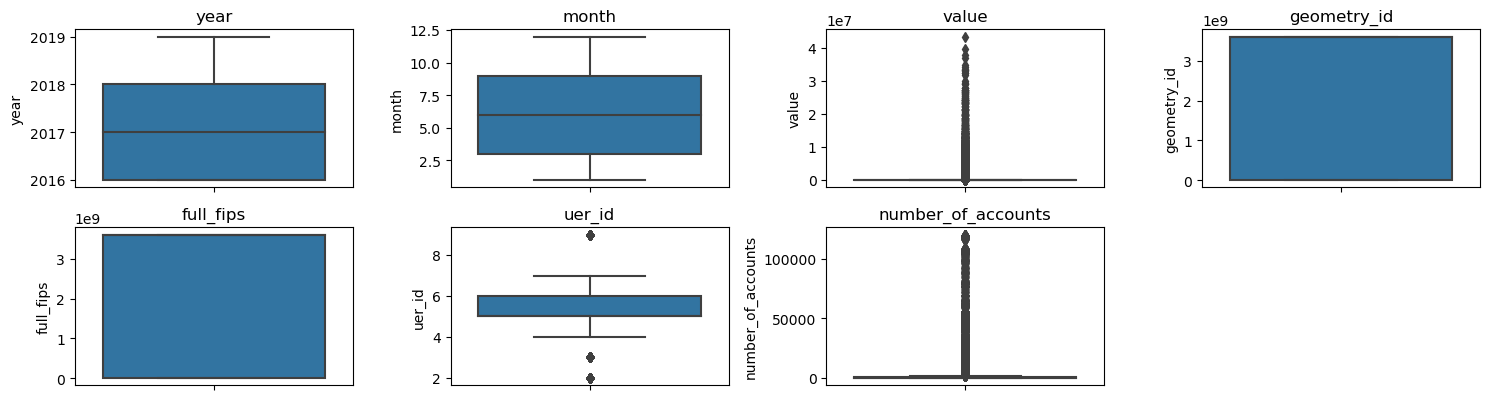

In [41]:
plt.figure(figsize=(15, 10))
 #enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

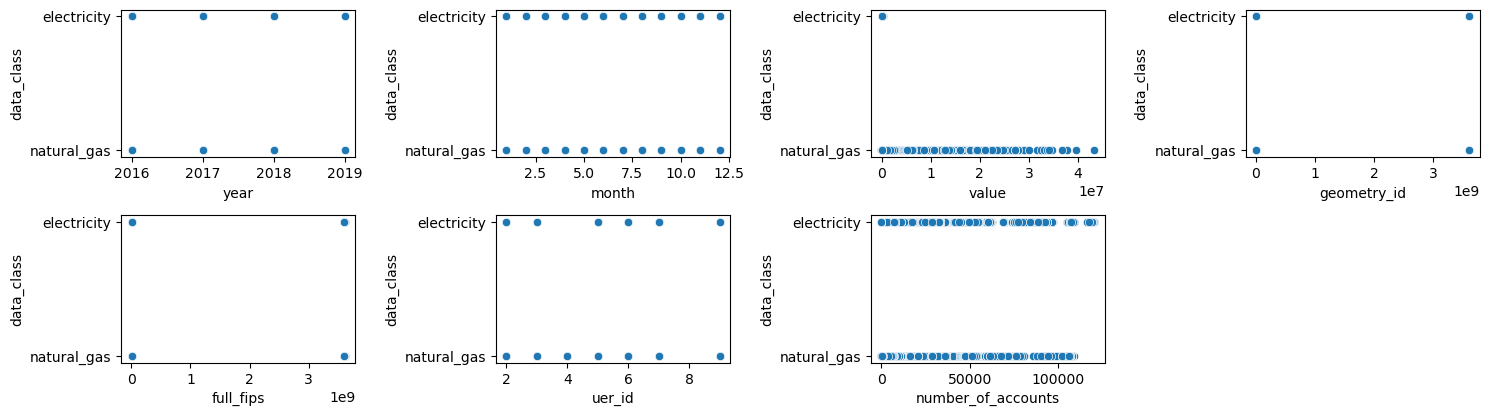

In [42]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='data_class')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

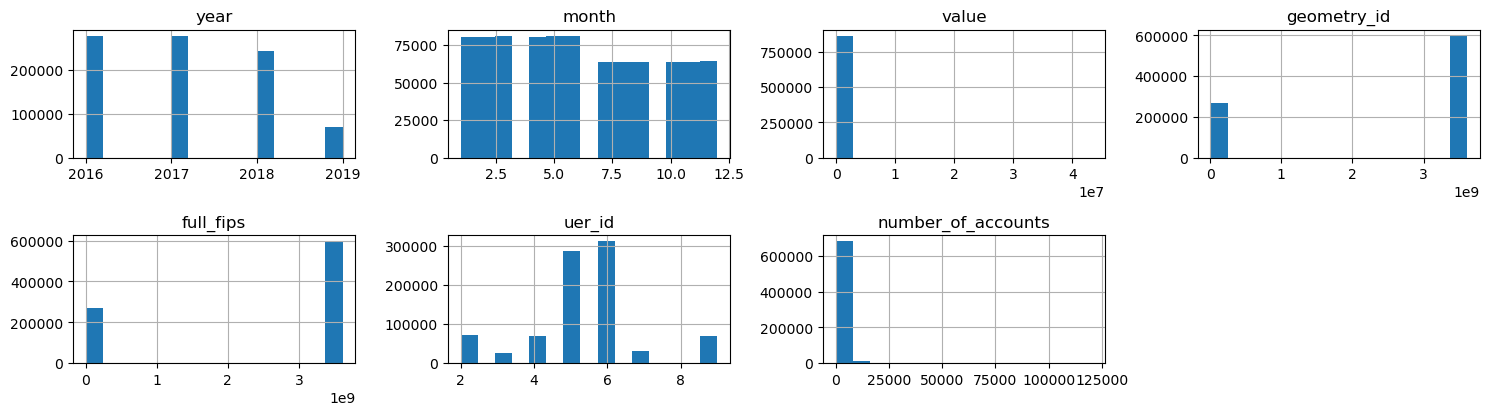

In [43]:
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

### Correlation

<AxesSubplot:>

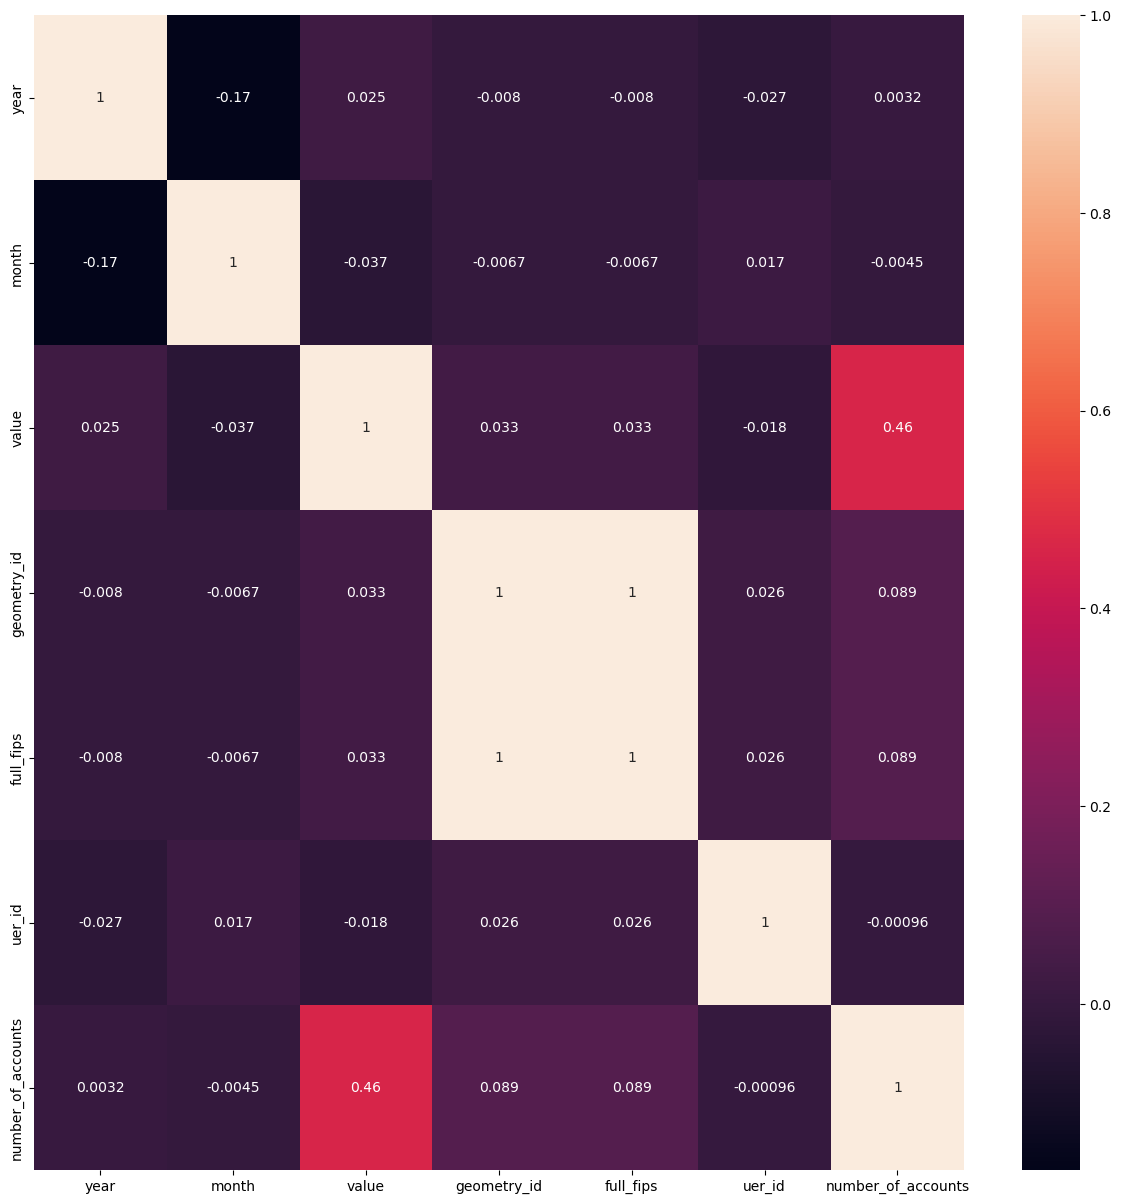

In [44]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)

Ther is a multicolliniarity in geometry_id and full_fips.

In [45]:
df[['geometry_id','full_fips']]

,geometry_id,full_fips
0,3668209,3668209
1,3668209,3668209
2,3670167,3670167
3,3668209,3668209
4,3668462,3668462
...,...,...
867261,3603538781,3603538781
867262,3603701165,3603701165
867263,3603936178,3603936178
867264,3603546217,3603546217


The column values are same. we can drop any of them

### Analysing categorical columns

In [46]:
# Checking the number of unique values in each categorical column
unique_counts = df[cat_cols].nunique()
unique_counts

data_class                 2
com_name                1278
com_type                   4
data_field                15
com_county                61
unit                       5
data_stream                1
utility_display_name       7
Georeference            1205
dtype: int64

**Summary of Unique Values:**
****
In our data set it has two type of columns. column with low cardinality and high cardinality

- **Low Cardinality Columns:**
  - data_class (2 unique values)
  - com_type (4 unique values)
  - unit (5 unique values)
****
One hot encoding method is suitable for these columns 
   
- **High Cardinality Columns:**
  - com_name (1278 unique values)
  - Georeference (1205 unique values)
  - com_county (62 unique values)
  - data_field (15 unique values)
****
Frequency Encoding method is suitable for these columns 

In [47]:
for col in cat_cols:
    print(f"\033[1mValues in {col}:\033[0m\n{df[col].unique()}")
    print(f"\033[1mNumber of unique values in {col}:\033[0m {df[col].nunique()}\n")
    print("\n" + "-"*80 + "\n") 

Values in data_class:
['electricity' 'natural_gas']
Number of unique values in data_class: 2


--------------------------------------------------------------------------------

Values in com_name:
['Sodus' 'Spencer' 'Southampton' ... 'Northampton' 'Ephratah' 'Benson']
Number of unique values in com_name: 1278


--------------------------------------------------------------------------------

Values in com_type:
['Village' 'Town' 'City' 'Reservation']
Number of unique values in com_type: 4


--------------------------------------------------------------------------------

Values in data_field:
['all_other_(o)' 'residential_(r)' 'total_(t)' 'small_consumer_(r+sc)'
 'icap_capacity_tag_(r+sc)' 'icap_capacity_tag_(r)'
 'icap_capacity_tag_(sc+o)' 'business_(sc+o)' 'icap_capacity_tag_(t)'
 'icap_capacity_tag_(sc)' 'icap_capacity_tag_(o)' 'small_commercial_(sc)'
 'cca-ineligible_customer_count_(sc)' 'cca-ineligible_customer_count_(r)'
 'other_(o)']
Number of unique values in data_field: 15


-

- Here the unique values and its count. 
* There is a column 'Community_monthly' we can remove this column becouse there is only one value.
- In 'unit' column the value 'Integer' and 'integer' are same. so we can normalize this

Distribution of data_class:
electricity    533365
natural_gas    333901
Name: data_class, dtype: int64


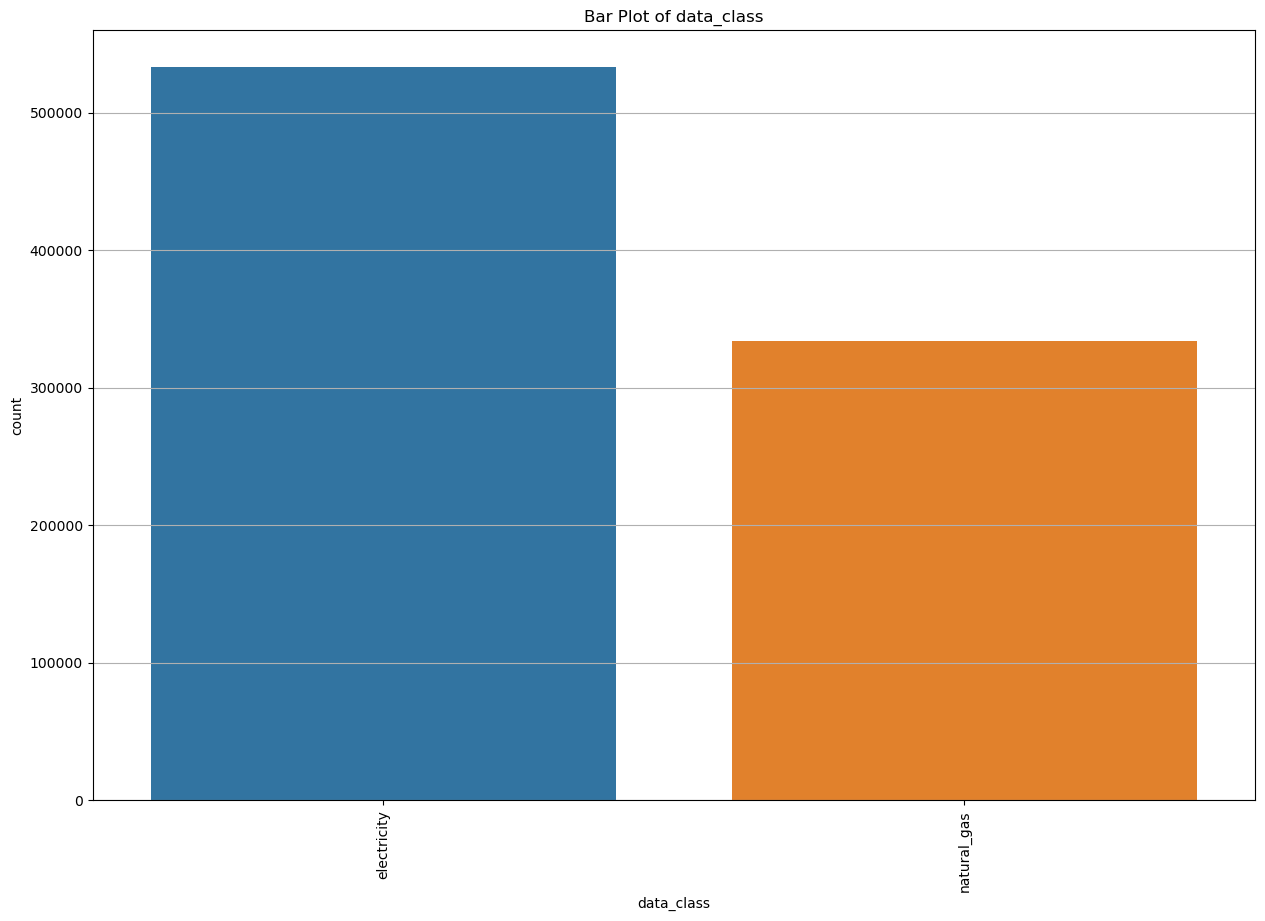


-----------------------------------------------------------------------------------------------------------------------------

Distribution of com_name:
Manchester            2592
Mount Morris          2553
Montgomery            2525
Canandaigua           2471
Geneseo               2387
                      ... 
Louisville             126
De Kalb                126
Benson                 126
Cornwall-on-Hudson      84
St. Regis Mohawk        36
Name: com_name, Length: 1278, dtype: int64


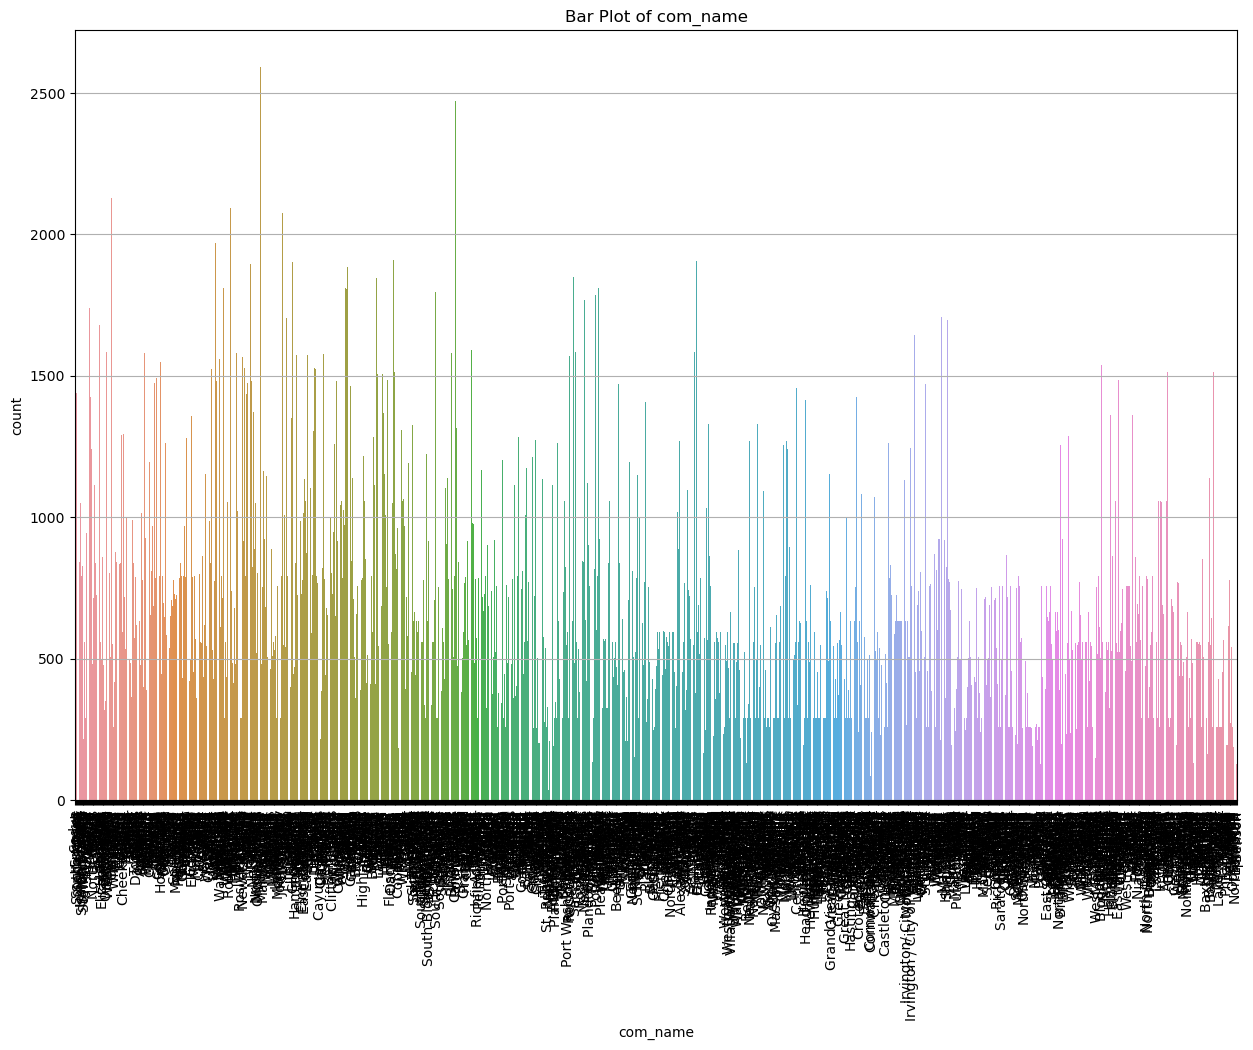


-----------------------------------------------------------------------------------------------------------------------------

Distribution of com_type:
Town           557023
Village        268868
City            41003
Reservation       372
Name: com_type, dtype: int64


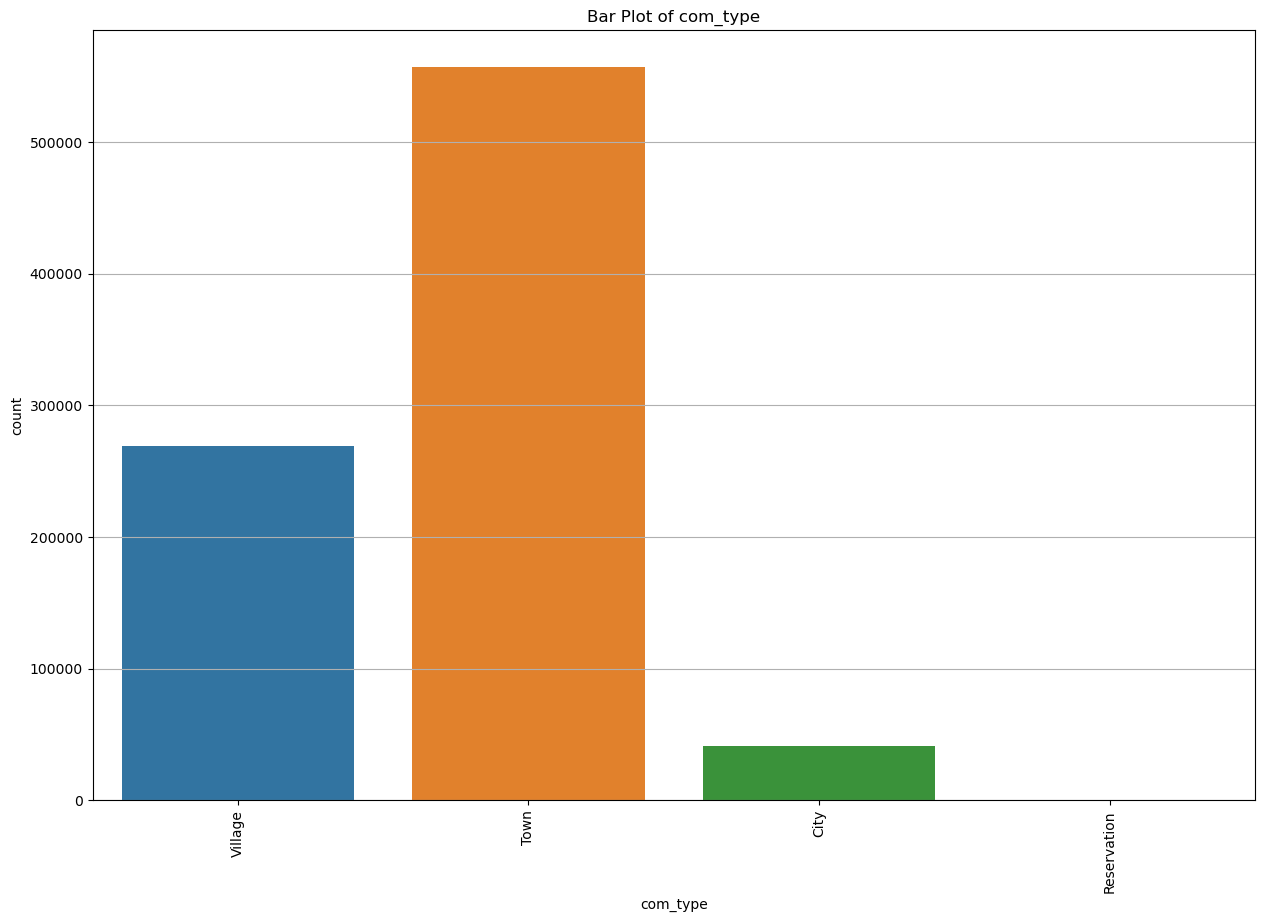


-----------------------------------------------------------------------------------------------------------------------------

Distribution of data_field:
total_(t)                             91771
cca-ineligible_customer_count_(sc)    86408
cca-ineligible_customer_count_(r)     86407
residential_(r)                       84112
business_(sc+o)                       81076
small_commercial_(sc)                 77576
small_consumer_(r+sc)                 69621
all_other_(o)                         65311
icap_capacity_tag_(t)                 44710
icap_capacity_tag_(r)                 41441
icap_capacity_tag_(sc+o)              39987
icap_capacity_tag_(sc)                35021
icap_capacity_tag_(r+sc)              32023
icap_capacity_tag_(o)                 30602
other_(o)                              1200
Name: data_field, dtype: int64


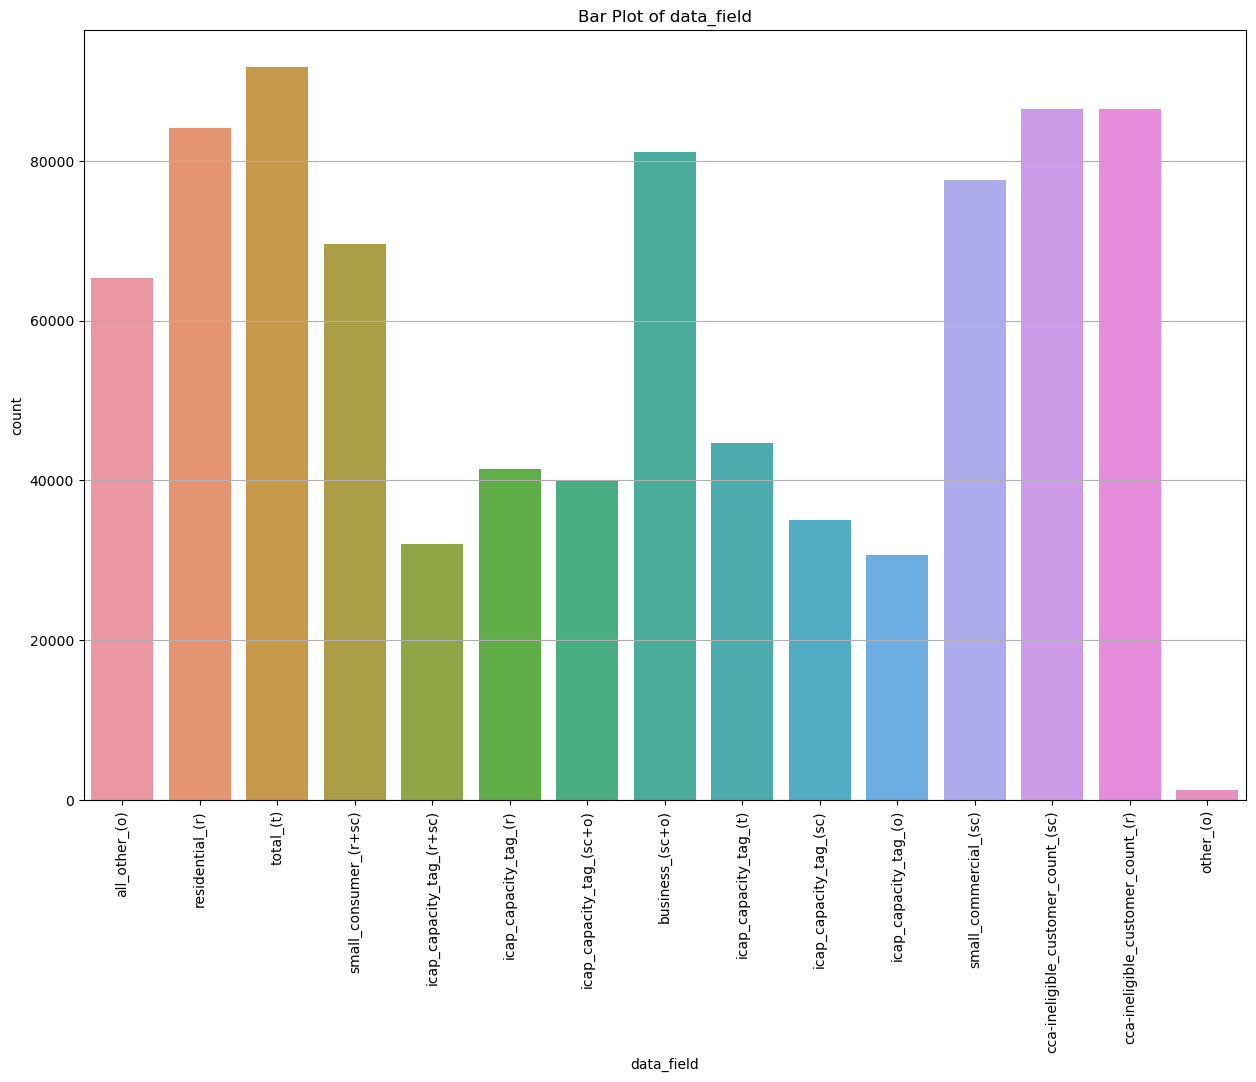


-----------------------------------------------------------------------------------------------------------------------------

Distribution of com_county:
Orange                30401
Monroe                29164
Erie                  29149
Westchester           28269
Steuben               26244
                      ...  
Hamilton               3368
Broome & Delaware       769
Ontario & Yates         740
Chenango & Madison      497
Genesee & Wyoming       258
Name: com_county, Length: 61, dtype: int64


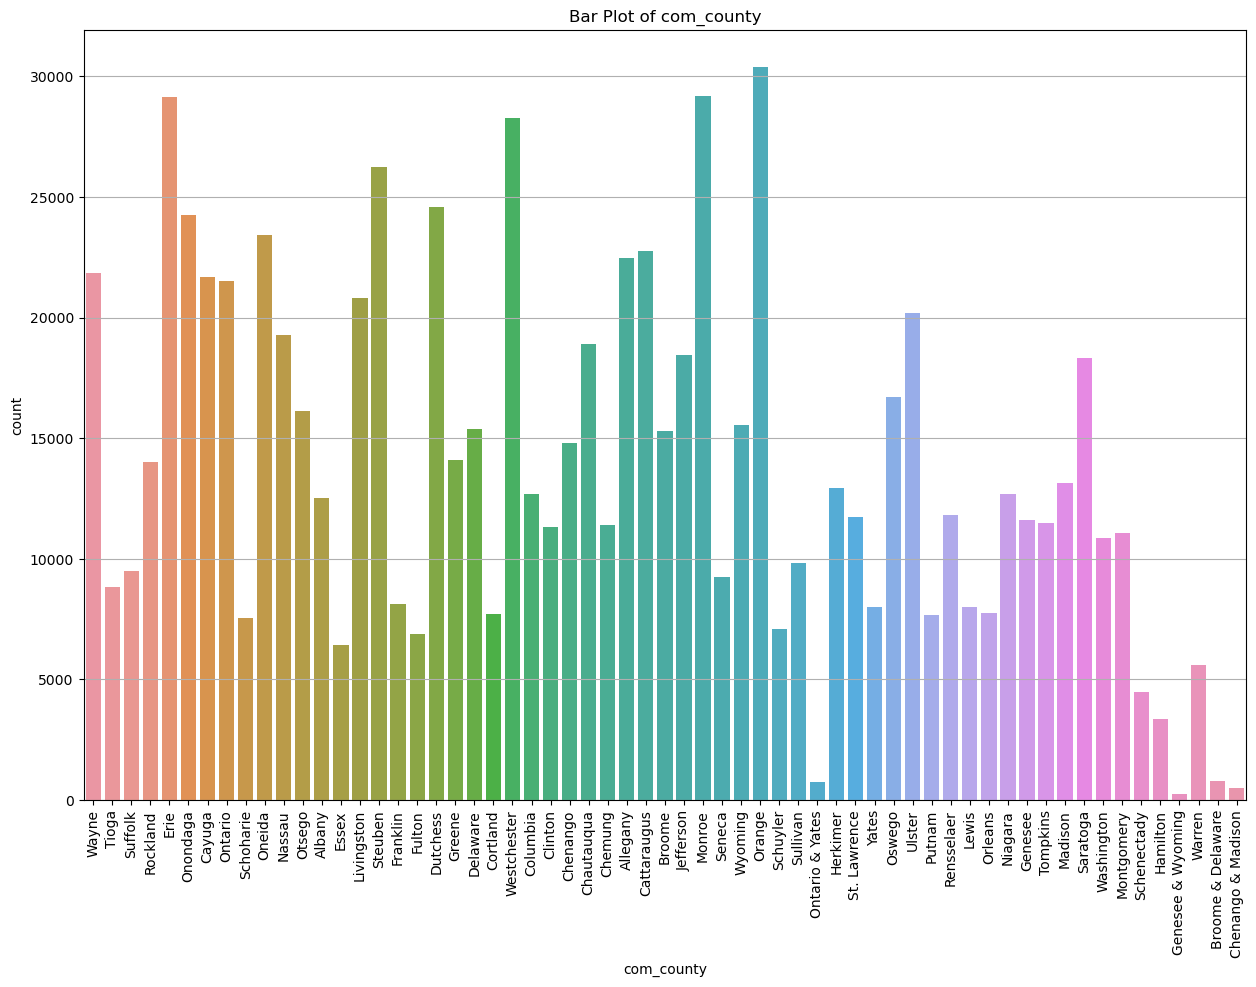


-----------------------------------------------------------------------------------------------------------------------------

Distribution of unit:
Therms     260118
MW         221123
MWh        217542
Integer    146610
integer     21873
Name: unit, dtype: int64


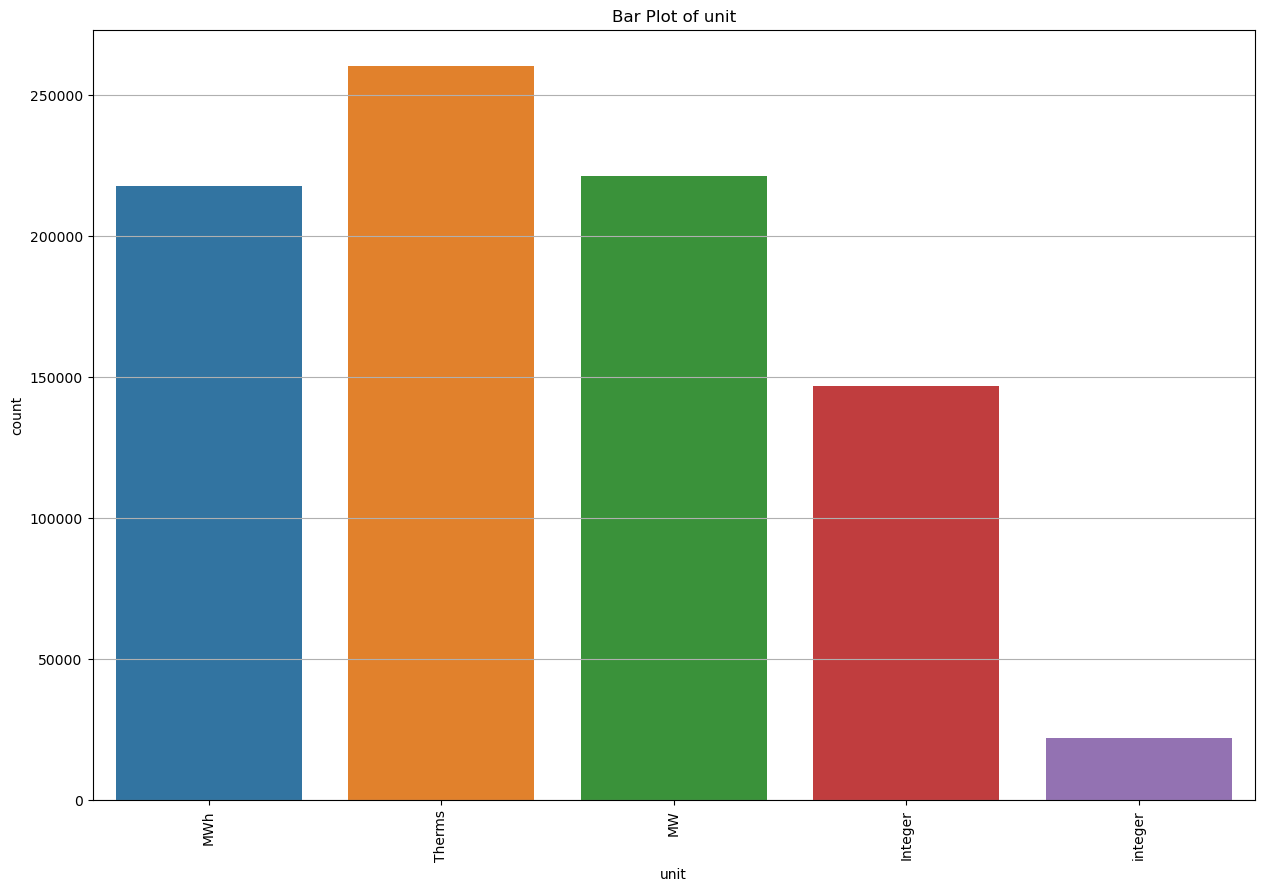


-----------------------------------------------------------------------------------------------------------------------------

Distribution of data_stream:
community_monthly    867266
Name: data_stream, dtype: int64


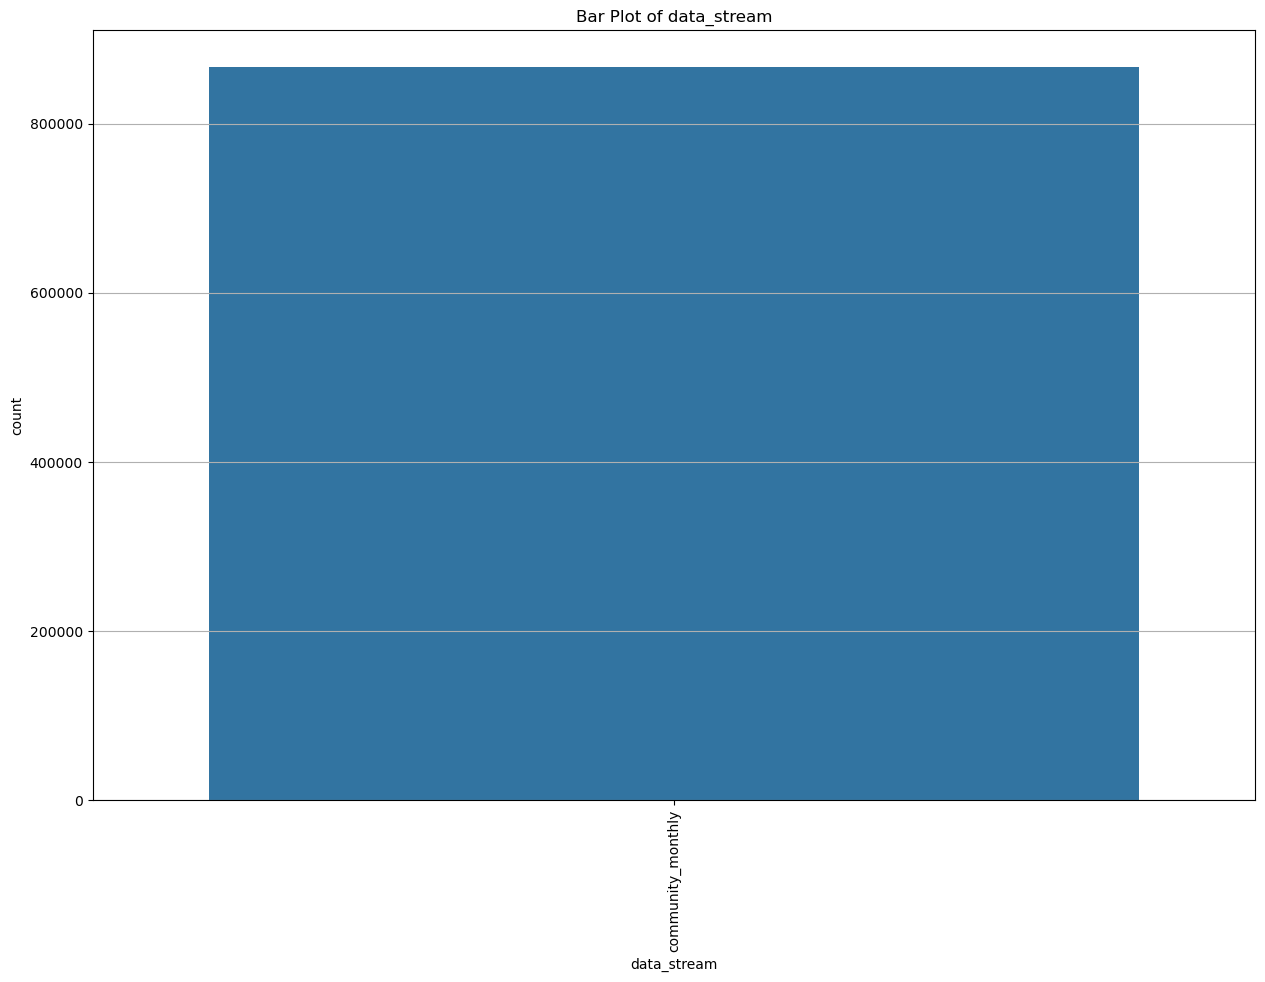


-----------------------------------------------------------------------------------------------------------------------------

Distribution of utility_display_name:
NYSEG                  311955
National Grid          286463
Central Hudson          72072
RG&E                    70535
National Fuel           69024
Orange and Rockland     32224
Consolidated Edison     24993
Name: utility_display_name, dtype: int64


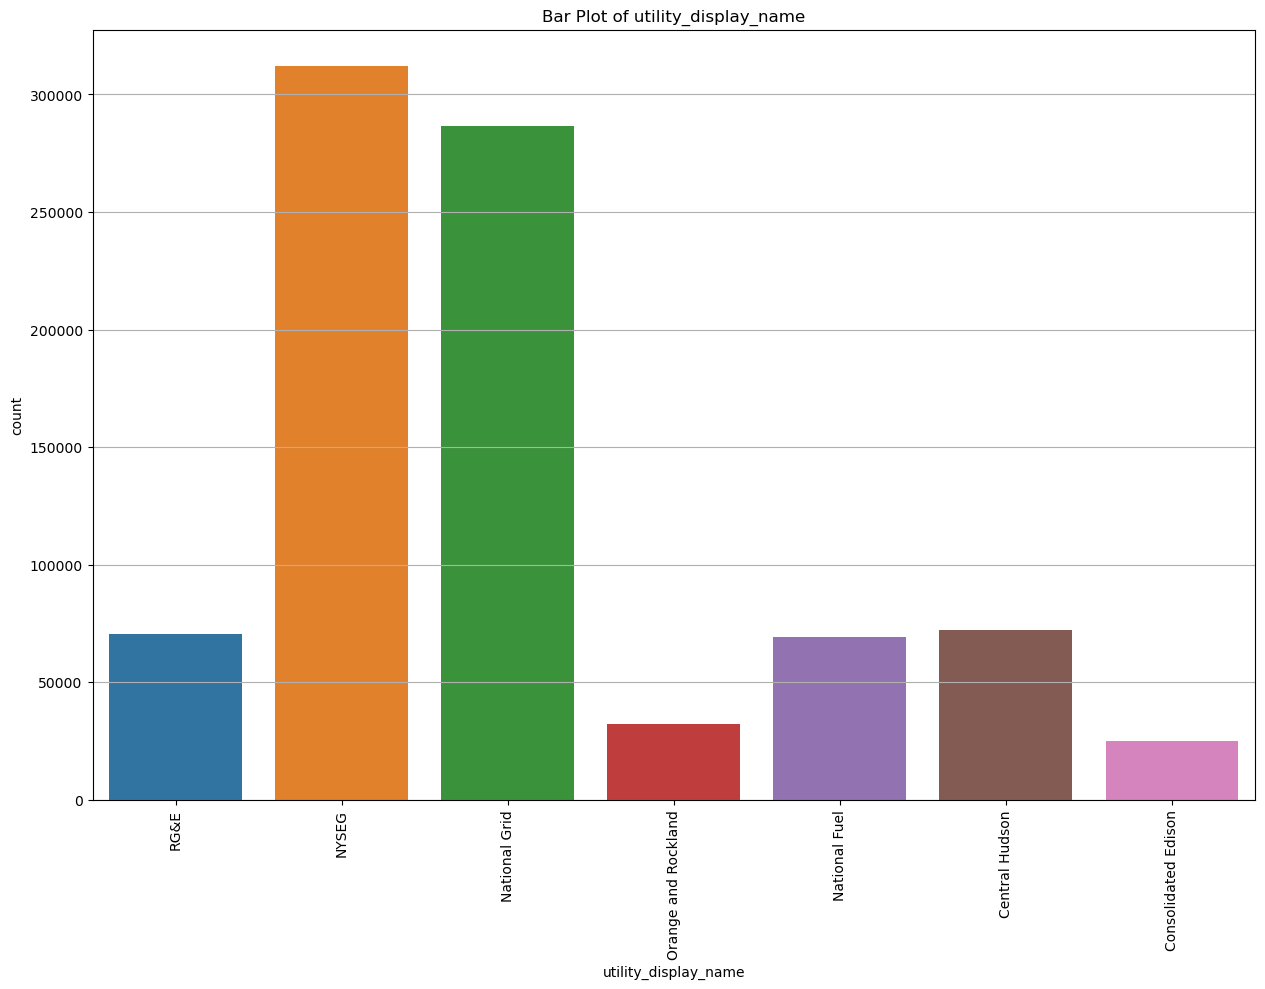


-----------------------------------------------------------------------------------------------------------------------------

Distribution of Georeference:
POINT (-73.96587 41.368093)     2753
POINT (-77.230129 42.970637)    2592
POINT (-77.873835 42.725256)    2553
POINT (-74.236978 41.527533)    2525
POINT (-77.282497 42.887495)    2471
                                ... 
POINT (-75.462898 43.7953)       130
POINT (-75.013185 44.892452)     126
POINT (-75.324704 44.491471)     126
POINT (-74.278386 43.252)        126
POINT (-74.647499 44.978933)      36
Name: Georeference, Length: 1205, dtype: int64


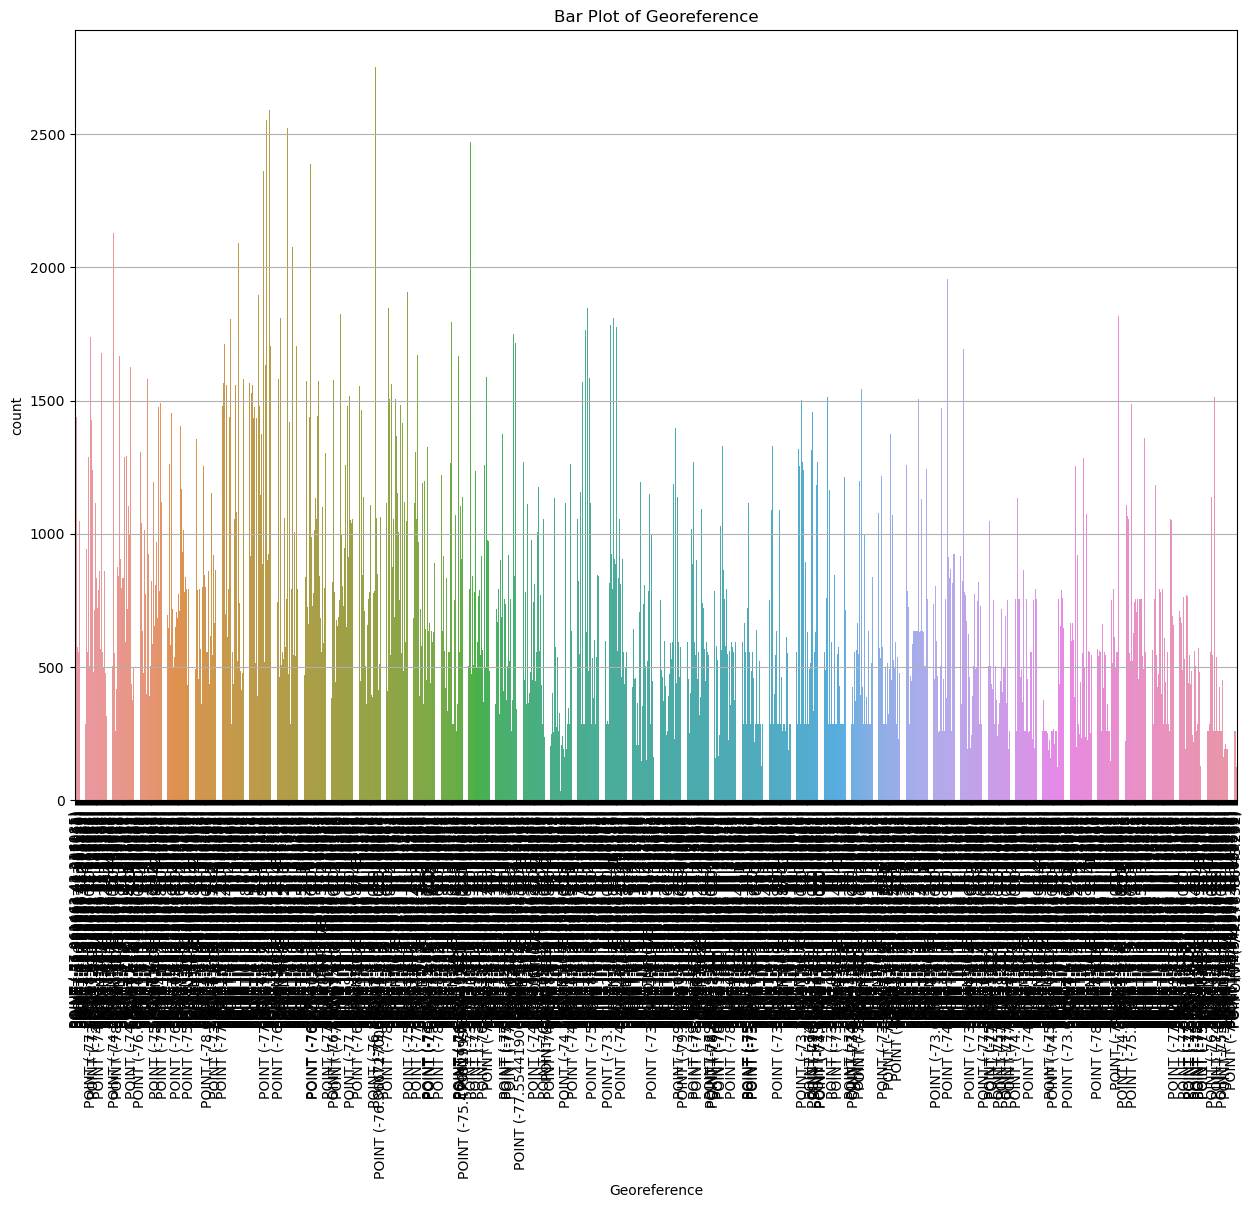


-----------------------------------------------------------------------------------------------------------------------------



In [48]:
for col in cat_cols:
    print(f"\033[1mDistribution of {col}:\033[0m")
    print(df[col].value_counts())
    
    # Bar plot visualization
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)
    
    # Grid lines only for y-axis
    plt.grid(axis='y')
    
    plt.show()
    print("\n" + "-"*125 + "\n")


In [49]:
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            print(f"\033[1mCrosstab of {col1} and {col2}:\033[0m")
            print(pd.crosstab(df[col1], df[col2],normalize='index'))
            print("\n" + "-"*80 + "\n") 


Crosstab of data_class and com_name:
com_name        Adams   Addison     Afton   Airmont     Akron   Alabama  \
data_class                                                                
electricity  0.001226  0.001573  0.001498  0.000416  0.000000  0.000399   
natural_gas  0.001797  0.000000  0.000000  0.001006  0.001006  0.001006   

com_name       Albany    Albion     Alden  Alexander  ...   Wright  Wurtsboro  \
data_class                                            ...                       
electricity  0.000855  0.001819  0.001867   0.000793  ...  0.00036   0.000439   
natural_gas  0.000898  0.002624  0.002013   0.002013  ...  0.00000   0.000000   

com_name      Wyoming     Yates   Yonkers      York  Yorkshire  Yorktown  \
data_class                                                                 
electricity  0.000711  0.000358  0.000667  0.000367   0.000435  0.001612   
natural_gas  0.001006  0.000863  0.000833  0.001150   0.001006  0.000833   

com_name     Yorkville  Youngsto

data_class  electricity  natural_gas
com_name                            
Adams          0.521531     0.478469
Addison        1.000000     0.000000
Afton          1.000000     0.000000
Airmont        0.397849     0.602151
Akron          0.000000     1.000000
...                 ...          ...
York           0.337931     0.662069
Yorkshire      0.408451     0.591549
Yorktown       0.755712     0.244288
Yorkville      0.462366     0.537634
Youngstown     0.434343     0.565657

[1278 rows x 2 columns]

--------------------------------------------------------------------------------

Crosstab of com_name and com_type:
com_type    City  Reservation      Town   Village
com_name                                         
Adams        0.0          0.0  0.555024  0.444976
Addison      0.0          0.0  0.466031  0.533969
Afton        0.0          0.0  0.450563  0.549437
Airmont      0.0          0.0  0.000000  1.000000
Akron        0.0          0.0  0.000000  1.000000
...          ...          

unit         Integer        MW       MWh    Therms   integer
com_name                                                    
Adams       0.172249  0.191388  0.234450  0.401914  0.000000
Addison     0.171633  0.514899  0.313468  0.000000  0.000000
Afton       0.180225  0.540676  0.279099  0.000000  0.000000
Airmont     0.129032  0.075269  0.193548  0.494624  0.107527
Akron       0.000000  0.000000  0.000000  0.750000  0.250000
...              ...       ...       ...       ...       ...
York        0.268966  0.103448  0.131034  0.496552  0.000000
Yorkshire   0.105634  0.137324  0.165493  0.443662  0.147887
Yorktown    0.075571  0.258348  0.411248  0.221441  0.033392
Yorkville   0.193548  0.161290  0.193548  0.451613  0.000000
Youngstown  0.101010  0.151515  0.181818  0.424242  0.141414

[1278 rows x 5 columns]

--------------------------------------------------------------------------------

Crosstab of com_name and data_stream:
data_stream  community_monthly
com_name                      

com_name        Adams   Addison     Afton   Airmont    Akron   Alabama  \
com_type                                                                 
City         0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
Reservation  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
Town         0.001249  0.000702  0.000646  0.000000  0.00000  0.000986   
Village      0.002075  0.001666  0.001633  0.002075  0.00125  0.000000   

com_name       Albany    Albion     Alden  Alexander  ...    Wright  \
com_type                                              ...             
City         0.018438  0.000000  0.000000   0.000000  ...  0.000000   
Reservation  0.000000  0.000000  0.000000   0.000000  ...  0.000000   
Town         0.000000  0.001978  0.001486   0.001066  ...  0.000345   
Village      0.000000  0.002767  0.003124   0.001863  ...  0.000000   

com_name     Wurtsboro   Wyoming    Yates   Yonkers      York  Yorkshire  \
com_type                                            

Georeference  POINT (-72.194744 40.964652)  POINT (-72.283861 40.931363)  \
com_type                                                                   
City                              0.000000                      0.000000   
Reservation                       0.000000                      0.000000   
Town                              0.000517                      0.000000   
Village                           0.001071                      0.001071   

Georeference  POINT (-72.295304 41.000329)  POINT (-72.359119 41.102532)  \
com_type                                                                   
City                              0.000000                       0.00000   
Reservation                       0.000000                       0.00000   
Town                              0.000000                       0.00107   
Village                           0.001071                       0.00000   

Georeference  POINT (-72.389644 40.887045)  POINT (-72.411523 40.898165)  \
com_type  

com_type                                City  Reservation      Town   Village
data_field                                                                   
all_other_(o)                       0.057264     0.000735  0.605350  0.336651
business_(sc+o)                     0.050496     0.000592  0.618432  0.330480
cca-ineligible_customer_count_(r)   0.042057     0.000486  0.641024  0.316433
cca-ineligible_customer_count_(sc)  0.042056     0.000486  0.641052  0.316406
icap_capacity_tag_(o)               0.044474     0.000000  0.700706  0.254820
icap_capacity_tag_(r)               0.038368     0.000000  0.697884  0.263748
icap_capacity_tag_(r+sc)            0.043656     0.000000  0.699154  0.257190
icap_capacity_tag_(sc)              0.043146     0.000000  0.698638  0.258216
icap_capacity_tag_(sc+o)            0.037962     0.000000  0.701778  0.260260
icap_capacity_tag_(t)               0.036412     0.000000  0.705681  0.257907
other_(o)                           0.125000     0.000000  0.300

unit                                 Integer        MW       MWh    Therms  \
data_field                                                                   
all_other_(o)                       0.000000  0.000000  0.357765  0.642235   
business_(sc+o)                     0.000000  0.000000  0.467845  0.532155   
cca-ineligible_customer_count_(r)   0.848369  0.000000  0.017846  0.007222   
cca-ineligible_customer_count_(sc)  0.848359  0.000000  0.017846  0.007222   
icap_capacity_tag_(o)               0.000000  0.986210  0.013790  0.000000   
icap_capacity_tag_(r)               0.000000  0.989455  0.010545  0.000000   
icap_capacity_tag_(r+sc)            0.000000  0.987072  0.012928  0.000000   
icap_capacity_tag_(sc)              0.000000  0.986579  0.013421  0.000000   
icap_capacity_tag_(sc+o)            0.000000  0.988871  0.011129  0.000000   
icap_capacity_tag_(t)               0.000000  0.989421  0.010579  0.000000   
other_(o)                           0.000000  0.000000  0.000000

data_class         electricity  natural_gas
com_county                                 
Albany                0.533711     0.466289
Allegany              0.691390     0.308610
Broome                0.717370     0.282630
Broome & Delaware     0.625488     0.374512
Cattaraugus           0.561278     0.438722
...                        ...          ...
Washington            0.778598     0.221402
Wayne                 0.630871     0.369129
Westchester           0.596838     0.403162
Wyoming               0.552124     0.447876
Yates                 0.604790     0.395210

[61 rows x 2 columns]

--------------------------------------------------------------------------------

Crosstab of com_county and com_name:
com_name           Adams  Addison  Afton  Airmont  Alabama    Albany  Albion  \
com_county                                                                     
Albany               0.0      0.0    0.0      0.0      0.0  0.060321     0.0   
Allegany             0.0      0.0    0.0     

unit                Integer        MW       MWh    Therms   integer
com_county                                                         
Albany             0.183835  0.190218  0.243916  0.382031  0.000000
Allegany           0.118799  0.341224  0.237508  0.231457  0.071012
Broome             0.178999  0.325025  0.284004  0.211973  0.000000
Broome & Delaware  0.187256  0.280884  0.250975  0.280884  0.000000
Cattaraugus        0.136661  0.228369  0.212067  0.329042  0.093861
...                     ...       ...       ...       ...       ...
Washington         0.191513  0.304982  0.317528  0.185978  0.000000
Wayne              0.174677  0.296622  0.251854  0.276847  0.000000
Westchester        0.037143  0.153454  0.392232  0.364215  0.052956
Wyoming            0.135907  0.268790  0.189125  0.335907  0.070270
Yates              0.197605  0.296407  0.209581  0.296407  0.000000

[61 rows x 5 columns]

--------------------------------------------------------------------------------

Crosstab o

com_name     Adams   Addison     Afton   Airmont     Akron   Alabama  \
unit                                                                   
Integer   0.001473  0.000982  0.000982  0.000491  0.000000  0.000409   
MW        0.001085  0.001954  0.001954  0.000190  0.000000  0.000312   
MWh       0.001351  0.001209  0.001025  0.000496  0.000000  0.000386   
Therms    0.001938  0.000000  0.000000  0.001061  0.000969  0.000969   
integer   0.000000  0.000000  0.000000  0.002743  0.003840  0.003840   

com_name    Albany    Albion     Alden  Alexander  ...    Wright  Wurtsboro  \
unit                                               ...                        
Integer   0.000737  0.002537  0.000982   0.000818  ...  0.000409   0.000491   
MW        0.000814  0.001628  0.001954   0.000615  ...  0.000271   0.000190   
MWh       0.000993  0.001977  0.001931   0.000768  ...  0.000331   0.000552   
Therms    0.000969  0.002630  0.001938   0.001938  ...  0.000000   0.000000   
integer   0.000000  0

Georeference  POINT (-72.194744 40.964652)  POINT (-72.283861 40.931363)  \
unit                                                                       
Integer                           0.000982                      0.000491   
MW                                0.000000                      0.000000   
MWh                               0.000000                      0.000000   
Therms                            0.001661                      0.000830   
integer                           0.000000                      0.000000   

Georeference  POINT (-72.295304 41.000329)  POINT (-72.359119 41.102532)  \
unit                                                                       
Integer                           0.000491                      0.000737   
MW                                0.000000                      0.000488   
MWh                               0.000000                      0.000588   
Therms                            0.000830                      0.000969   
integer    

com_county           Albany  Allegany    Broome  Broome & Delaware  \
data_stream                                                          
community_monthly  0.014795  0.026532  0.018044           0.000908   

com_county         Cattaraugus    Cayuga  Chautauqua  Chemung  Chenango  \
data_stream                                                               
community_monthly     0.026864  0.025595    0.022304  0.01344  0.017474   

com_county         Chenango & Madison  ...  Sullivan     Tioga  Tompkins  \
data_stream                            ...                                 
community_monthly            0.000587  ...  0.011575  0.010401  0.013537   

com_county           Ulster    Warren  Washington     Wayne  Westchester  \
data_stream                                                                
community_monthly  0.023822  0.006597    0.012797  0.025789     0.033371   

com_county          Wyoming     Yates  
data_stream                            
community_monthly  0.0183

data_field            all_other_(o)  business_(sc+o)  \
utility_display_name                                   
Central Hudson             0.089424         0.092088   
Consolidated Edison        0.084744         0.132757   
NYSEG                      0.066247         0.072392   
National Fuel              0.125000         0.125000   
National Grid              0.067377         0.105867   
Orange and Rockland        0.088257         0.121524   
RG&E                       0.075268         0.080343   

data_field            cca-ineligible_customer_count_(r)  \
utility_display_name                                      
Central Hudson                                 0.098651   
Consolidated Edison                            0.040851   
NYSEG                                          0.092106   
National Fuel                                  0.125000   
National Grid                                  0.103741   
Orange and Rockland                            0.134806   
RG&E                   

unit                   Integer        MW       MWh    Therms   integer
utility_display_name                                                  
Central Hudson        0.183150  0.217075  0.305070  0.294705  0.000000
Consolidated Edison   0.021846  0.121714  0.393230  0.403313  0.059897
NYSEG                 0.180904  0.363514  0.266458  0.189123  0.000000
National Fuel         0.000000  0.000000  0.000000  0.750000  0.250000
National Grid         0.207482  0.226127  0.272070  0.294321  0.000000
Orange and Rockland   0.134062  0.077861  0.245873  0.445382  0.096822
RG&E                  0.179684  0.308358  0.237372  0.274587  0.000000

--------------------------------------------------------------------------------

Crosstab of utility_display_name and data_stream:
data_stream           community_monthly
utility_display_name                   
Central Hudson                      1.0
Consolidated Edison                 1.0
NYSEG                               1.0
National Fuel               

data_class                    electricity  natural_gas
Georeference                                          
POINT (-72.194744 40.964652)     0.000000     1.000000
POINT (-72.283861 40.931363)     0.000000     1.000000
POINT (-72.295304 41.000329)     0.000000     1.000000
POINT (-72.359119 41.102532)     0.496644     0.503356
POINT (-72.389644 40.887045)     0.000000     1.000000
...                                   ...          ...
POINT (-79.595176 42.159351)     0.552597     0.447403
POINT (-79.629966 42.02082)      0.417678     0.582322
POINT (-79.694407 42.130114)     1.000000     0.000000
POINT (-79.703602 42.053599)     1.000000     0.000000
POINT (-79.710476 42.266859)     0.434343     0.565657

[1205 rows x 2 columns]

--------------------------------------------------------------------------------

Crosstab of Georeference and com_name:
com_name                      Adams  Addison  Afton  Airmont  Akron  Alabama  \
Georeference                                              

com_county                    Albany  Allegany  Broome  Broome & Delaware  \
Georeference                                                                
POINT (-72.194744 40.964652)     0.0       0.0     0.0                0.0   
POINT (-72.283861 40.931363)     0.0       0.0     0.0                0.0   
POINT (-72.295304 41.000329)     0.0       0.0     0.0                0.0   
POINT (-72.359119 41.102532)     0.0       0.0     0.0                0.0   
POINT (-72.389644 40.887045)     0.0       0.0     0.0                0.0   
...                              ...       ...     ...                ...   
POINT (-79.595176 42.159351)     0.0       0.0     0.0                0.0   
POINT (-79.629966 42.02082)      0.0       0.0     0.0                0.0   
POINT (-79.694407 42.130114)     0.0       0.0     0.0                0.0   
POINT (-79.703602 42.053599)     0.0       0.0     0.0                0.0   
POINT (-79.710476 42.266859)     0.0       0.0     0.0                0.0   

In [50]:
for col in cat_cols:
    print(f"\033[1mCrosstab of 'data_class' and '{col}':\033[0m")
    print(pd.crosstab(df['data_class'], df[col], margins =True))
    print("\n" + "-"*80 + "\n")     

Crosstab of 'data_class' and 'data_class':
data_class   electricity  natural_gas     All
data_class                                   
electricity       533365            0  533365
natural_gas            0       333901  333901
All               533365       333901  867266

--------------------------------------------------------------------------------

Crosstab of 'data_class' and 'com_name':
com_name     Adams  Addison  Afton  Airmont  Akron  Alabama  Albany  Albion  \
data_class                                                                    
electricity    654      839    799      222      0      213     456     970   
natural_gas    600        0      0      336    336      336     300     876   
All           1254      839    799      558    336      549     756    1846   

com_name     Alden  Alexander  ...  Wurtsboro  Wyoming  Yates  Yonkers  York  \
data_class                     ...                                             
electricity    996        423  ...        234  

- Above insight helps you understand the distribution of all categorical columns.

In [51]:
df.columns

Index(['year', 'data_class', 'month', 'value', 'com_name', 'com_type',
       'data_field', 'com_county', 'geometry_id', 'full_fips', 'unit',
       'uer_id', 'data_stream', 'utility_display_name', 'number_of_accounts',
       'Georeference'],
      dtype='object')

## Data Preprocessing

In [52]:
df1=df.copy()
print('original data :', df.shape)
print('copied data :', df1.shape)

original data : (867266, 16)
copied data : (867266, 16)


In [53]:
df

,year,data_class,month,value,com_name,com_type,data_field,com_county,geometry_id,full_fips,unit,uer_id,data_stream,utility_display_name,number_of_accounts,Georeference
0,2017,electricity,8,804.812,Sodus,Village,all_other_(o),Wayne,3668209,3668209,MWh,9,community_monthly,RG&E,37.0,POINT (-77.061462 43.236085)
1,2016,natural_gas,5,-999.000,Sodus,Village,all_other_(o),Wayne,3668209,3668209,Therms,9,community_monthly,RG&E,121.0,POINT (-77.061462 43.236085)
2,2017,natural_gas,6,7039.000,Spencer,Village,residential_(r),Tioga,3670167,3670167,Therms,6,community_monthly,NYSEG,182.0,POINT (-76.492961 42.217112)
3,2019,electricity,6,753.996,Sodus,Village,all_other_(o),Wayne,3668209,3668209,MWh,6,community_monthly,NYSEG,37.0,POINT (-77.061462 43.236085)
4,2017,natural_gas,10,335498.000,Southampton,Village,total_(t),Suffolk,3668462,3668462,Therms,5,community_monthly,National Grid,2612.0,POINT (-72.389644 40.887045)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867261,2016,natural_gas,4,-999.000,Johnstown,City,business_(sc+o),Fulton,3603538781,3603538781,Therms,5,community_monthly,National Grid,341.0,POINT (-74.374236 43.006903)
867262,2017,natural_gas,3,14.000,Alexander,Town,cca-ineligible_customer_count_(sc),Genesee,3603701165,3603701165,integer,4,community_monthly,National Fuel,14.0,POINT (-78.256925 42.901295)
867263,2018,electricity,10,3.080,Hunter,Town,icap_capacity_tag_(t),Greene,3603936178,3603936178,MW,2,community_monthly,Central Hudson,0.0,POINT (-74.219292 42.213719)
867264,2018,natural_gas,6,827.000,Mayfield,Town,small_consumer_(r+sc),Fulton,3603546217,3603546217,Therms,5,community_monthly,National Grid,23.0,POINT (-74.264686 43.104571)


### Remove unwanted columns

In [54]:
df1.drop(['full_fips','uer_id','data_stream','utility_display_name'], axis=1, inplace=True)
df1.shape

(867266, 12)

- Here dropped unnecessary columns.
- Droped 'full_fips' becouse it is duplicate column.
- 'data_stream' has only one value.
- 'user_id' and 'utility_display_name' columns do not carry any useful information for predictive model.

### Normlizing duplicate values

In [55]:
df['unit'] = df['unit'].replace('Integer', 'integer')
df['unit'].unique()

array(['MWh', 'Therms', 'MW', 'integer'], dtype=object)

### Handling missing values

In [56]:
df1.isnull().sum()

year                       0
data_class                 0
month                      0
value                      0
com_name                   0
com_type                   0
data_field                 0
com_county             20160
geometry_id                0
unit                       0
number_of_accounts    160953
Georeference               0
dtype: int64

For the missing value treatment we can use mean, median, mode or KNNimputer. KNNImputer is a method used for imputing missing values by using the k-nearest neighbors approach.

In [57]:
# filling null values with 'unknown'
df1['com_county'].fillna('Unknown', inplace=True)

# filling null values with '0'
df1['number_of_accounts'].fillna(0, inplace=True)

In [58]:
df1.isnull().sum()

year                  0
data_class            0
month                 0
value                 0
com_name              0
com_type              0
data_field            0
com_county            0
geometry_id           0
unit                  0
number_of_accounts    0
Georeference          0
dtype: int64

### Handling Outliers

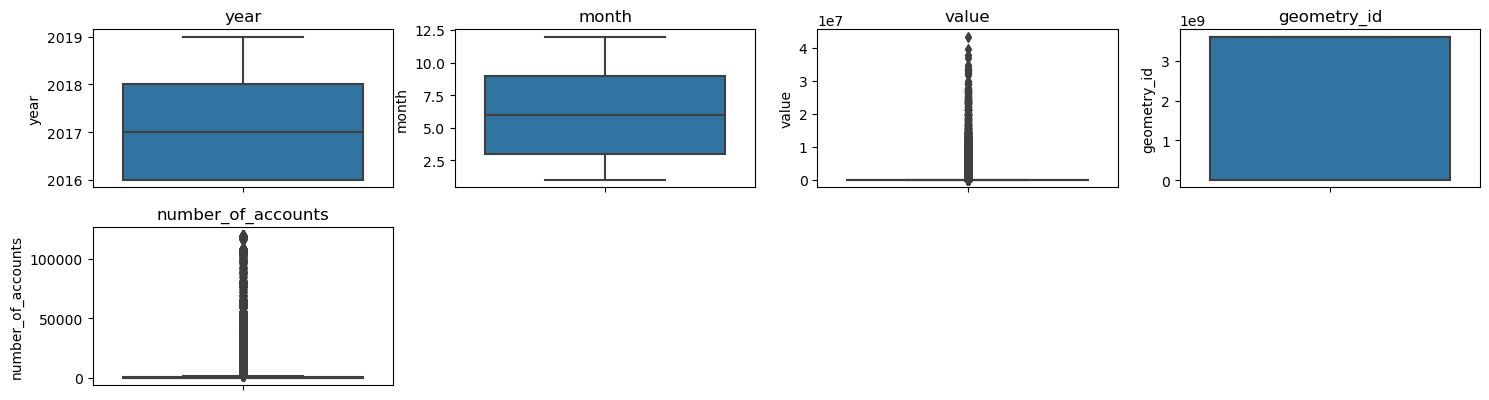

In [59]:
plt.figure(figsize=(15, 10))
numeric_columns = df1.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Here IQR method is used for outlier treatment

In [60]:
def whisker(df1, column):
    q1 = df1[column].quantile(0.25)
    q3 = df1[column].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr

    # Replace outliers with upper and lower bounds
    df1[column] = df1[column].apply(lambda x: uw if x > uw else (lw if x < lw else x))

whisker(df1, 'number_of_accounts')
whisker(df1, 'value')

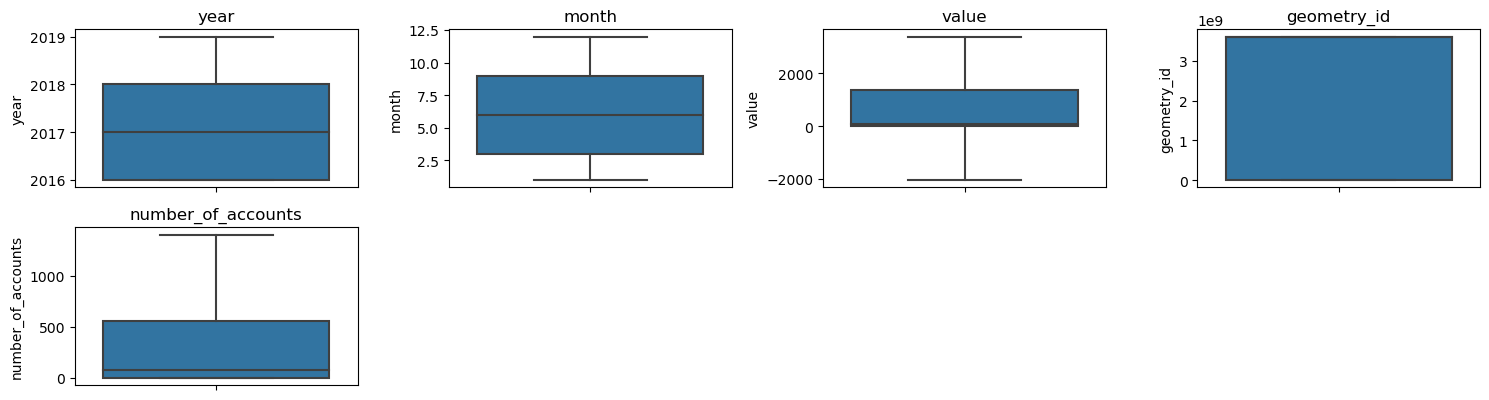

In [61]:
plt.figure(figsize=(15, 10))
numeric_columns = df1.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

All the outliers are removed

### skewness and kurtosis

In [62]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Ensure numeric columns are defined
numeric_columns = df1.select_dtypes(include="number").columns

# Calculate skewness and kurtosis
skewness = df1[numeric_columns].apply(skew)
kurt = df1[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))  # (fisher=False) ensures that the normal kurtosis is calculated

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print("\033[1;4m" + "skewness" + "\033[0m" + '\n' + str(skewness))

if not positive_skewness.empty:
    print('\nVariables with positive skewness (skew > 1):\n', positive_skewness)
else:
    print('\nNo variables with positive skewness (skew > 1)')

if not negative_skewness.empty:
    print('\nVariables with negative skewness (skew < -1):\n', negative_skewness)
else:
    print('\nNo variables with negative skewness (skew < -1)')

print("\n" + "-" * 80 + "\n")

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print("\033[1;4m" + "kurtosis" + "\033[0m" + '\n' + str(kurt))

if not platykurtic.empty:
    print('\nVariables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
else:
    print('\nNo variables with platykurtic distribution (kurtosis < 3)')

if not leptokurtic.empty:
    print('\nVariables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)
else:
    print('\nNo variables with leptokurtic distribution (kurtosis > 3)')


skewness
year                  0.314114
month                 0.153572
value                 0.927789
geometry_id          -0.820134
number_of_accounts    1.244767
dtype: float64

Variables with positive skewness (skew > 1):
 number_of_accounts    1.244767
dtype: float64

No variables with negative skewness (skew < -1)

--------------------------------------------------------------------------------

kurtosis
year                  2.034712
month                 1.820927
value                 2.514985
geometry_id           1.672636
number_of_accounts    2.955722
dtype: float64

Variables with platykurtic distribution (kurtosis < 3):
 year                  2.034712
month                 1.820927
value                 2.514985
geometry_id           1.672636
number_of_accounts    2.955722
dtype: float64

No variables with leptokurtic distribution (kurtosis > 3)


In [63]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Ensure numeric columns are defined
numeric_columns = df1.select_dtypes(include="number").columns

# Calculate skewness and kurtosis
skewness = df1[numeric_columns].apply(skew)
kurt = df1[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))


def kew_kurt(stat_name, data, threshold, direction):
    if not data.empty:
        print(f'\nVariables with {direction} {stat_name} ({stat_name} > {threshold}):\n', data)
    else:
        print(f'\nNo variables with {direction} {stat_name} ({stat_name} > {threshold})')

        
# Print skewness and kurtosis results

print("\033[1;4m" + "skewness" + "\033[0m" + '\n' + str(skewness))

kew_kurt("Skewness", skewness[skewness > 1], 1, "positive")
kew_kurt("Skewness", skewness[skewness < -1], -1, "negative")


print("\n" + "-" * 80 + "\n")


print("\033[1;4m" + "kurtosis" + "\033[0m" + '\n' + str(kurt))

kew_kurt("Kurtosis", kurt[kurt < 3], 3, "platykurtic")
kew_kurt("Kurtosis", kurt[kurt > 3], 3, "leptokurtic")

skewness
year                  0.314114
month                 0.153572
value                 0.927789
geometry_id          -0.820134
number_of_accounts    1.244767
dtype: float64

Variables with positive Skewness (Skewness > 1):
 number_of_accounts    1.244767
dtype: float64

No variables with negative Skewness (Skewness > -1)

--------------------------------------------------------------------------------

kurtosis
year                  2.034712
month                 1.820927
value                 2.514985
geometry_id           1.672636
number_of_accounts    2.955722
dtype: float64

Variables with platykurtic Kurtosis (Kurtosis > 3):
 year                  2.034712
month                 1.820927
value                 2.514985
geometry_id           1.672636
number_of_accounts    2.955722
dtype: float64

No variables with leptokurtic Kurtosis (Kurtosis > 3)


In [64]:
# Assuming 'df' is your DataFrame
numeric_df1 = df1.select_dtypes(include=[np.number])

# Calculate skewness and kurtosis
skewness = numeric_df1.apply(lambda x: skew(x.dropna()))
kurt = numeric_df1.apply(lambda x: kurtosis(x.dropna()))

# Print skewness and kurtosis
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurt)

Skewness:
 year                  0.314114
month                 0.153572
value                 0.927789
geometry_id          -0.820134
number_of_accounts    1.244767
dtype: float64
Kurtosis:
 year                 -0.965288
month                -1.179073
value                -0.485015
geometry_id          -1.327364
number_of_accounts   -0.044278
dtype: float64


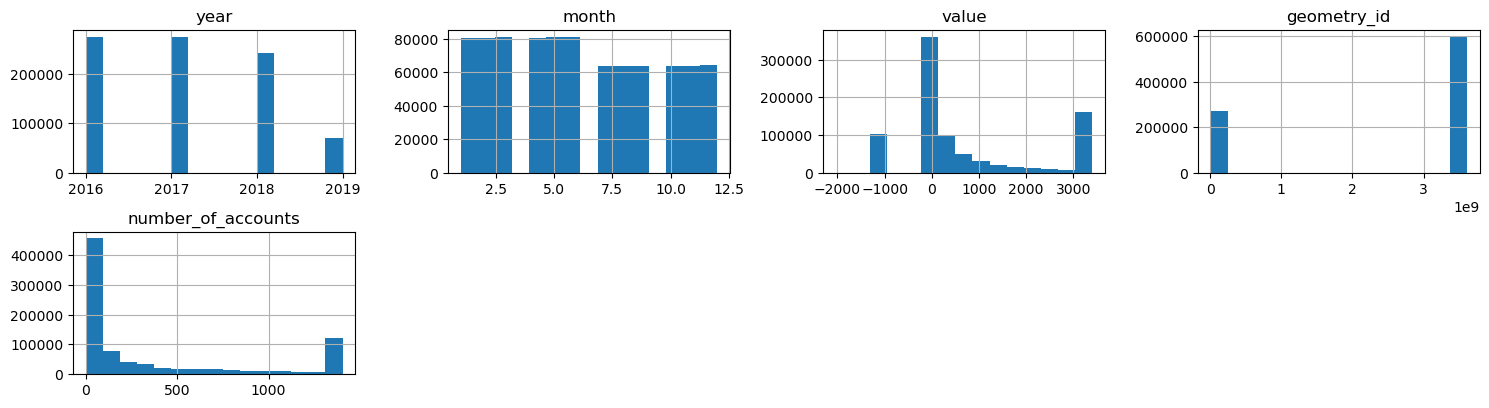

In [65]:
# Histograms for numerical columns after outlier treatment
df1[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

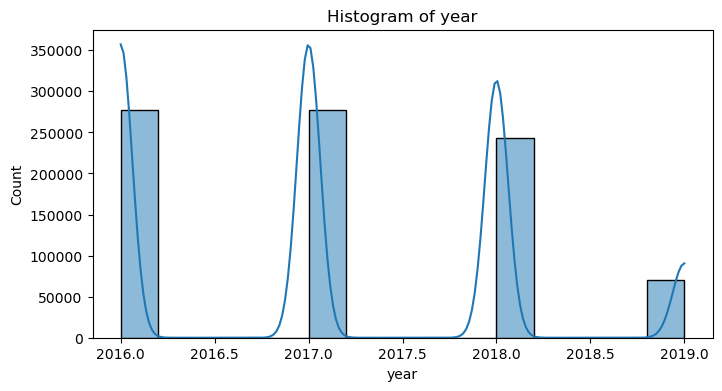

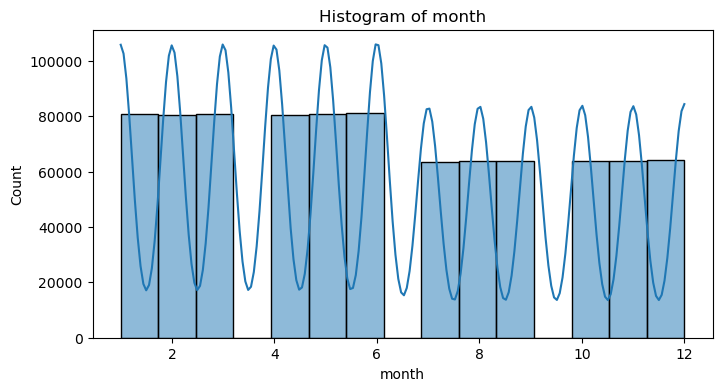

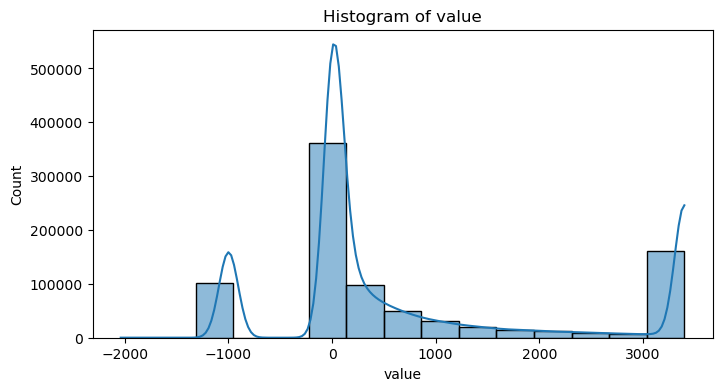

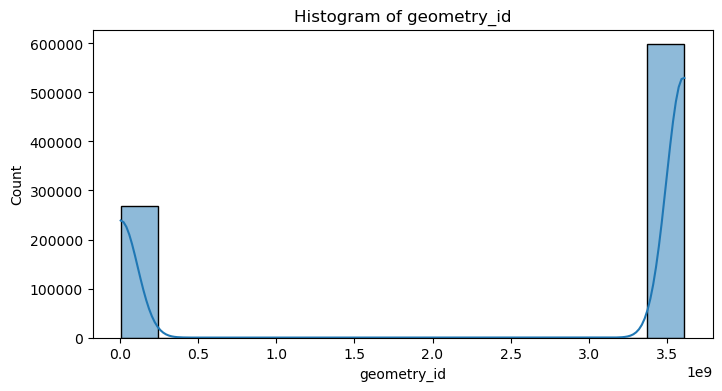

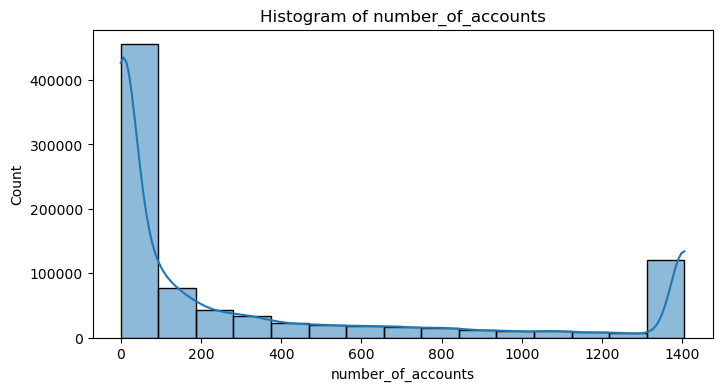

In [66]:
numerical_columns= df1.select_dtypes(include=['number']).columns.tolist()

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[col], kde=True, bins=15)
    plt.title(f'Histogram of {col}')
    plt.show()


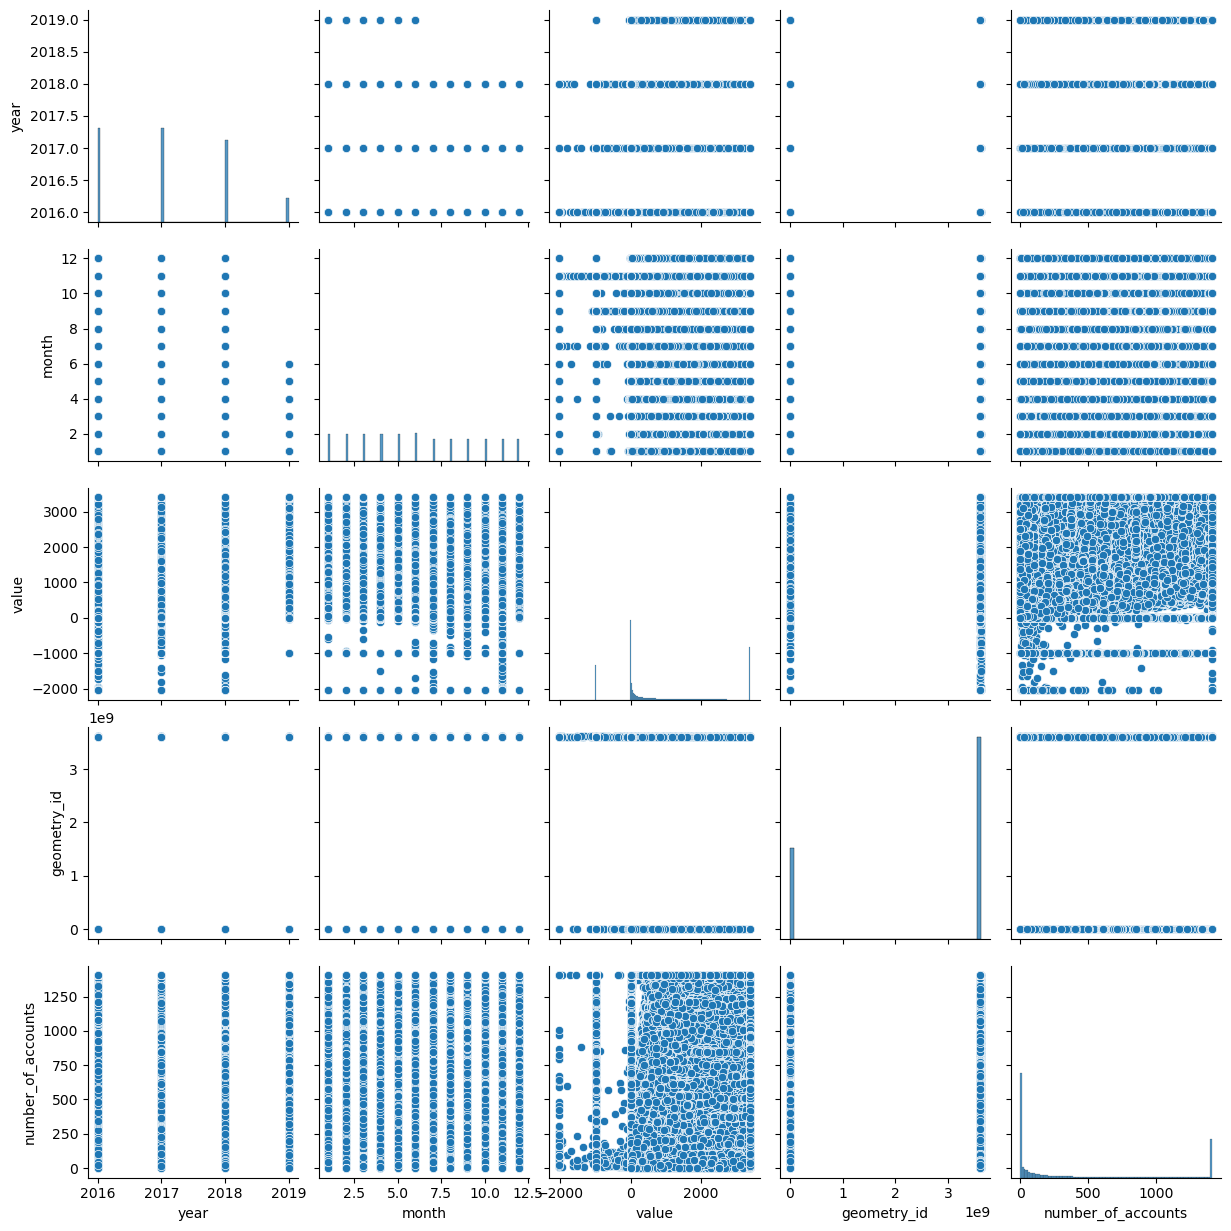

In [67]:
sns.pairplot(df1)

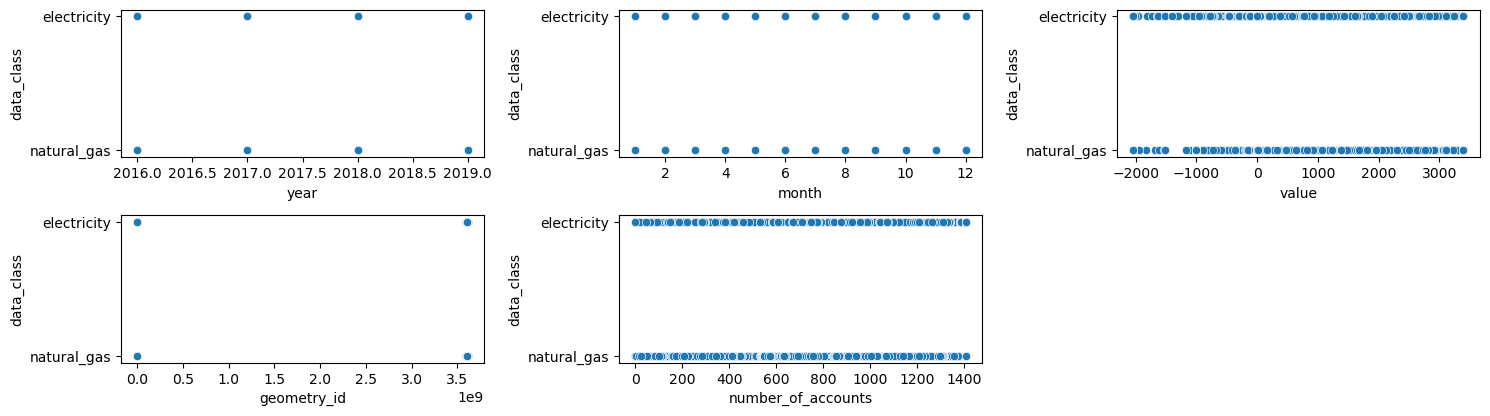

In [68]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df1,x=col,y='data_class')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<AxesSubplot:>

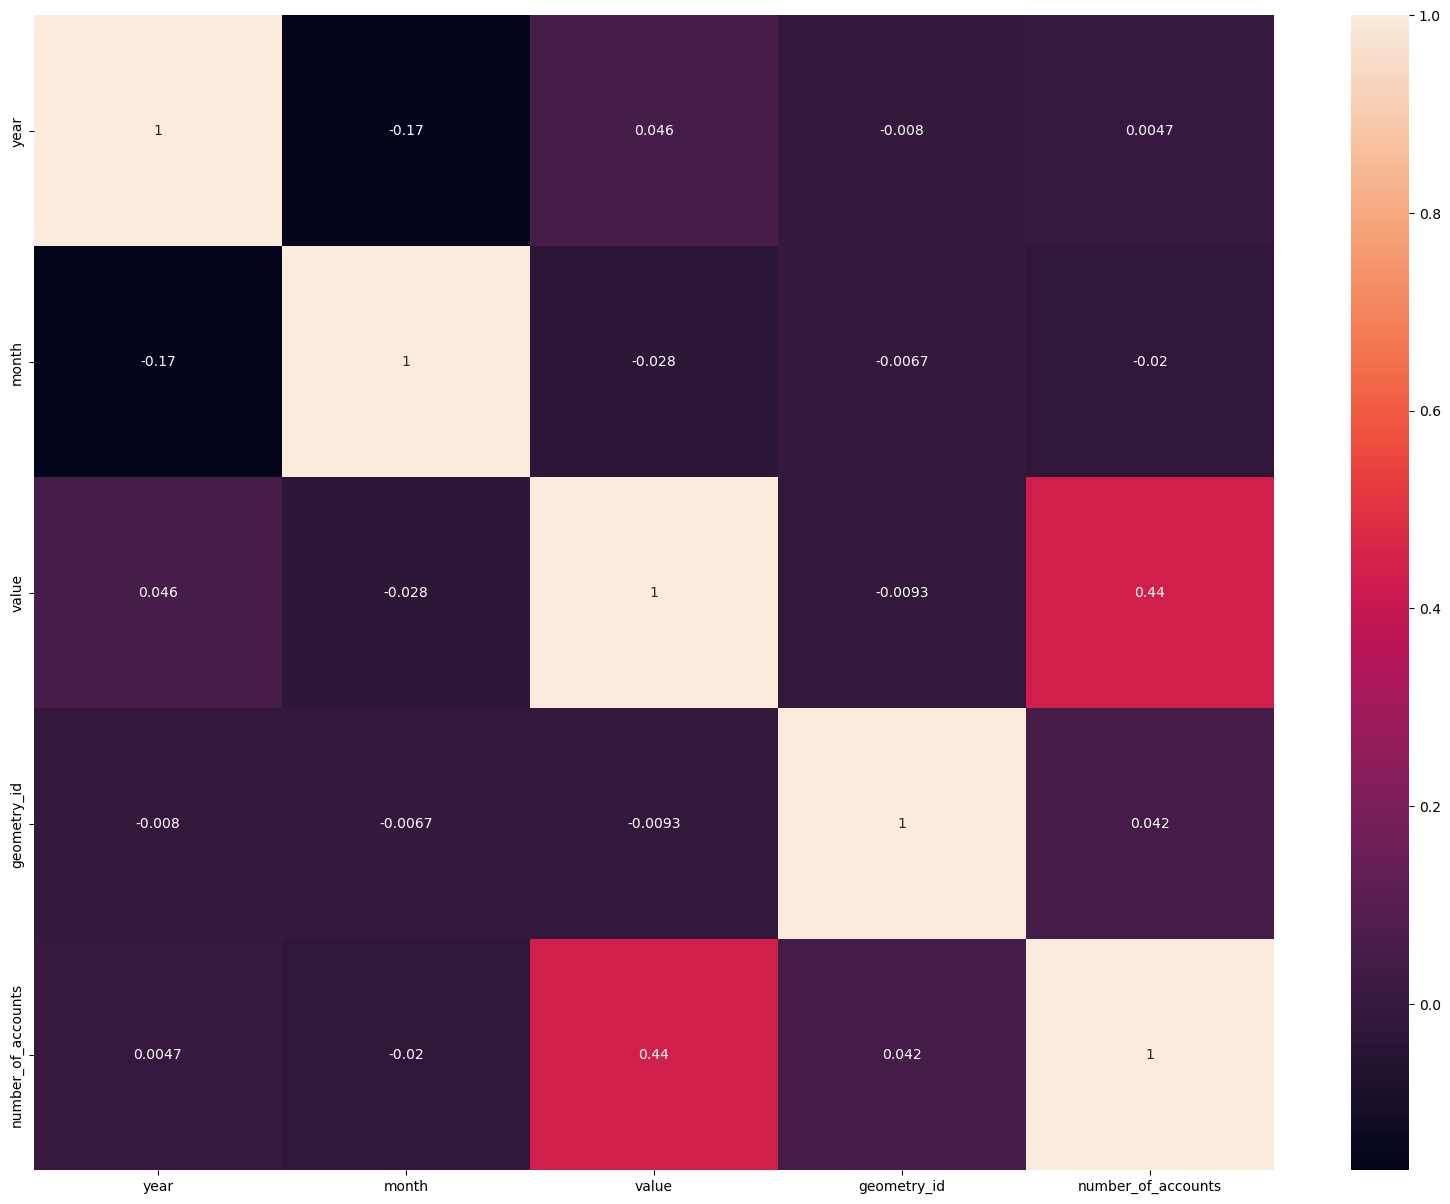

In [69]:
plt.figure(figsize=(20,15))
sns.heatmap(df1[numeric_columns].corr(),annot=True)

## Encoding Categorical Variables

In [70]:
X = df1.drop(columns=['data_class']) 
y = df1['data_class']

In [71]:
print(X.shape)
print(y.shape)

(867266, 11)
(867266,)


In [72]:
# Checking the number of unique values in each categorical column
unique_counts = df1.select_dtypes(include='object').nunique()
unique_counts

data_class         2
com_name        1278
com_type           4
data_field        15
com_county        62
unit               5
Georeference    1205
dtype: int64

- **Low Cardinality Columns:**
  - data_class (2 unique values)
  - com_type (4 unique values)
  - unit (5 unique values)

- **High Cardinality Columns:**
  - com_name (1278 unique values)
  - Georeference (1205 unique values)
  - com_county (62 unique values)
  - data_field (15 unique values)

In [73]:
# One-Hot Encoding for low cardinality columns
cat_encoded = pd.get_dummies(X, columns=['com_type', 'unit'], drop_first=True)


# Frequency Encoding for high cardinality columns
for col in ['com_name', 'Georeference', 'com_county', 'data_field']:
    freq_encoding = X[col].value_counts(normalize=True)  # Calculate the frequency of each category
    cat_encoded[col] = X[col].map(freq_encoding)  # Map the original values to their frequency


cat_encoded.head(), y.head()


(   year  month       value  com_name  data_field  com_county  geometry_id  \
 0  2017      8   804.81200  0.002423    0.075307    0.025190      3668209   
 1  2016      5  -999.00000  0.002423    0.075307    0.025190      3668209   
 2  2017      6  3400.02625  0.001660    0.096985    0.010160      3670167   
 3  2019      6   753.99600  0.002423    0.075307    0.025190      3668209   
 4  2017     10  3400.02625  0.000664    0.105816    0.010959      3668462   
 
    number_of_accounts  Georeference  com_type_Reservation  com_type_Town  \
 0                37.0      0.002423                     0              0   
 1               121.0      0.002423                     0              0   
 2               182.0      0.001660                     0              0   
 3                37.0      0.002423                     0              0   
 4              1405.0      0.000664                     0              0   
 
    com_type_Village  unit_MW  unit_MWh  unit_Therms  unit_integer

In [74]:
cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867266 entries, 0 to 867265
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  867266 non-null  int64  
 1   month                 867266 non-null  int64  
 2   value                 867266 non-null  float64
 3   com_name              867266 non-null  float64
 4   data_field            867266 non-null  float64
 5   com_county            867266 non-null  float64
 6   geometry_id           867266 non-null  int64  
 7   number_of_accounts    867266 non-null  float64
 8   Georeference          867266 non-null  float64
 9   com_type_Reservation  867266 non-null  uint8  
 10  com_type_Town         867266 non-null  uint8  
 11  com_type_Village      867266 non-null  uint8  
 12  unit_MW               867266 non-null  uint8  
 13  unit_MWh              867266 non-null  uint8  
 14  unit_Therms           867266 non-null  uint8  
 15  

In [75]:
X = cat_encoded
X.head()

,year,month,value,com_name,data_field,com_county,geometry_id,number_of_accounts,Georeference,com_type_Reservation,com_type_Town,com_type_Village,unit_MW,unit_MWh,unit_Therms,unit_integer
0,2017,8,804.81200,0.002423,0.075307,0.025190,3668209,37.0,0.002423,0,0,1,0,1,0,0
1,2016,5,-999.00000,0.002423,0.075307,0.025190,3668209,121.0,0.002423,0,0,1,0,0,1,0
2,2017,6,3400.02625,0.001660,0.096985,0.010160,3670167,182.0,0.001660,0,0,1,0,0,1,0
3,2019,6,753.99600,0.002423,0.075307,0.025190,3668209,37.0,0.002423,0,0,1,0,1,0,0
4,2017,10,3400.02625,0.000664,0.105816,0.010959,3668462,1405.0,0.000664,0,0,1,0,0,1,0


In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867266 entries, 0 to 867265
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  867266 non-null  int64  
 1   month                 867266 non-null  int64  
 2   value                 867266 non-null  float64
 3   com_name              867266 non-null  float64
 4   data_field            867266 non-null  float64
 5   com_county            867266 non-null  float64
 6   geometry_id           867266 non-null  int64  
 7   number_of_accounts    867266 non-null  float64
 8   Georeference          867266 non-null  float64
 9   com_type_Reservation  867266 non-null  uint8  
 10  com_type_Town         867266 non-null  uint8  
 11  com_type_Village      867266 non-null  uint8  
 12  unit_MW               867266 non-null  uint8  
 13  unit_MWh              867266 non-null  uint8  
 14  unit_Therms           867266 non-null  uint8  
 15  

In [77]:
X.shape

(867266, 16)

In [78]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 867266 entries, 0 to 867265
Series name: data_class
Non-Null Count   Dtype 
--------------   ----- 
867266 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


In [79]:
y.value_counts()

electricity    533365
natural_gas    333901
Name: data_class, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
# Encoding target variable
ylabel_encoder = LabelEncoder()
y = ylabel_encoder.fit_transform(y)

# Create a mapping of original labels to numeric values
label_mapping = dict(zip(ylabel_encoder.classes_, ylabel_encoder.transform(ylabel_encoder.classes_)))
#zip: Combines the original class labels and their encoded values into pairs.
#dict: Converts the pairs into a dictionary format for easy readability.

print("Label Mapping:", label_mapping)
print("Encoded Labels:", y)


Label Mapping: {'electricity': 0, 'natural_gas': 1}
Encoded Labels: [0 1 1 ... 0 1 1]


In [81]:
y

array([0, 1, 1, ..., 0, 1, 1])

## Feature Scaling

In [82]:
# Identify binary columns (excluding the target variable)

binary_cols = X.columns[(X.nunique() == 2)].tolist()
continuous_cols = [col for col in X.columns if col not in binary_cols]

In [83]:
X.columns

Index(['year', 'month', 'value', 'com_name', 'data_field', 'com_county',
       'geometry_id', 'number_of_accounts', 'Georeference',
       'com_type_Reservation', 'com_type_Town', 'com_type_Village', 'unit_MW',
       'unit_MWh', 'unit_Therms', 'unit_integer'],
      dtype='object')

In [84]:
continuous_cols

['year',
 'month',
 'value',
 'com_name',
 'data_field',
 'com_county',
 'geometry_id',
 'number_of_accounts',
 'Georeference']

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

In [86]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,867256,867257,867258,867259,867260,867261,867262,867263,867264,867265
year,-0.128838,-1.178148,-0.128838,1.969781,-0.128838,0.920472,0.920472,0.920472,-1.178148,1.969781,...,0.920472,0.920472,-1.178148,-1.178148,-0.128838,-1.178148,-0.128838,0.920472,0.920472,-1.178148
month,0.537671,-0.335663,-0.044552,-0.044552,1.119893,-0.626774,-0.044552,0.828782,-0.044552,-0.626774,...,-0.917885,-0.626774,-0.335663,1.119893,0.246559,-0.626774,-0.917885,1.119893,-0.044552,1.702115
value,0.022704,-1.241621,1.841737,-0.012914,1.841737,1.841737,-0.240203,1.841737,0.292900,0.332324,...,-0.541403,-1.241621,-0.538075,1.841737,-0.509862,-1.241621,-0.531590,-0.539244,0.038256,1.841737
com_name,2.488750,2.488750,1.109395,2.488750,-0.693573,-0.731135,2.488750,2.488750,2.488750,2.488750,...,-0.180228,0.735864,-1.325864,-0.317955,0.431195,0.735864,0.389460,1.660302,-0.192749,1.873153
data_field,-0.225161,-0.225161,0.693510,-0.225161,1.067751,-0.014562,0.693510,-0.014562,-1.851709,1.067751,...,0.693510,-0.225161,0.545162,1.067751,0.805699,0.545162,0.805699,-1.231785,-0.014562,1.067751
com_county,0.544304,0.544304,-1.319125,0.544304,-1.220056,-0.577470,0.544304,0.544304,0.544304,0.544304,...,-0.563889,-1.598031,-2.097233,-1.598031,-1.598031,-1.598031,-0.917562,-0.563889,-1.598031,-0.563889
geometry_id,-1.490868,-1.490868,-1.490867,-1.490868,-1.490868,-1.490868,-1.490868,-1.490868,-1.490868,-1.490868,...,0.669569,0.669326,0.669685,0.669321,0.669308,0.669326,0.669424,0.669565,0.669331,0.669551
number_of_accounts,-0.636792,-0.469950,-0.348791,-0.636792,2.080345,0.612535,0.727736,0.415900,-0.710281,1.005805,...,-0.710281,-0.702336,-0.670557,2.080345,-0.620902,-0.032983,-0.682474,-0.710281,-0.664598,-0.301122
Georeference,2.211214,2.211214,0.911162,2.211214,-0.788149,-0.823551,2.211214,2.211214,2.211214,2.211214,...,-0.304317,0.559106,-1.384088,-0.434126,0.271954,0.559106,0.232618,1.430396,-0.316118,1.631009
com_type_Reservation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Addressing the Class imbalance

In [87]:
y_series = pd.Series(y)
print(y_series.value_counts())

0    533365
1    333901
dtype: int64


In [88]:
target_counts = y_series.value_counts()
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 1.597374670935397


In [89]:
# Example: Checking the mean of a feature for each class
feature_mean = X.groupby(y).mean()
print(feature_mean)


       year     month     value  com_name  data_field  com_county  \
0 -0.045389 -0.007141 -0.066581 -0.021328   -0.303735   -0.055895   
1  0.072504  0.011407  0.106355  0.034068    0.485178    0.089285   

   geometry_id  number_of_accounts  Georeference  com_type_Reservation  \
0     0.081805            0.034908     -0.029039              0.000067   
1    -0.130673           -0.055761      0.046386              0.001006   

   com_type_Town  com_type_Village   unit_MW  unit_MWh  unit_Therms  \
0       0.684552          0.272451  0.414581  0.407867     0.000000   
1       0.574742          0.370026  0.000000  0.000000     0.779027   

   unit_integer  
0      0.000877  
1      0.064106  


## Feature selection

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_top_features = rf_feature_importances.nlargest(10)

# Feature Selection using SelectKBest with ANOVA F-test
k_best = SelectKBest(score_func=f_classif, k=10)
k_best.fit(X_train, y_train)
k_best_top_features = pd.Series(k_best.scores_, index=X_train.columns).nlargest(10)

# Display top 10 features from both methods
print("Random Forest Top Features:\n", rf_top_features)
print("\nSelectKBest Top Features:\n", k_best_top_features)

# Comparing Model Performance with the Top Features
# Model with Random Forest Top Features
rf_top_feature_columns = rf_top_features.index
X_train_rf = X_train[rf_top_feature_columns]
X_test_rf = X_test[rf_top_feature_columns]

rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Model with SelectKBest Top Features
k_best_top_feature_columns = k_best_top_features.index
X_train_kbest = X_train[k_best_top_feature_columns]
X_test_kbest = X_test[k_best_top_feature_columns]

rf_model.fit(X_train_kbest, y_train)
y_pred_kbest = rf_model.predict(X_test_kbest)
kbest_accuracy = accuracy_score(y_test, y_pred_kbest)

# Displaying the results
print(f"\nRandom Forest Model Accuracy with Top Features: {rf_accuracy}")
print(f"SelectKBest Model Accuracy with Top Features: {kbest_accuracy}")


Random Forest Top Features:
 unit_Therms           0.416348
unit_MWh              0.110167
value                 0.097172
data_field            0.095155
number_of_accounts    0.090117
unit_MW               0.088663
unit_integer          0.047514
Georeference          0.014066
com_name              0.013406
com_county            0.011964
dtype: float64

SelectKBest Top Features:
 unit_Therms         1.315221e+06
unit_MW             1.649957e+05
unit_MWh            1.608008e+05
data_field          1.046551e+05
unit_integer        2.436700e+04
com_type_Town       7.681071e+03
geometry_id         6.593314e+03
com_type_Village    6.491441e+03
value               4.454077e+03
com_county          3.084279e+03
dtype: float64

Random Forest Model Accuracy with Top Features: 0.997851487431778
SelectKBest Model Accuracy with Top Features: 0.9960104543008687


Here we can use random forest features becouse that have high accuracy

In [91]:
X1 = X[['unit_Therms', 'value', 'data_field', 'unit_MWh', 'number_of_accounts',
       'unit_MW', 'unit_integer', 'com_name', 'Georeference', 'com_county']]

## Model building & Training and Testing Data


Logistic Regression - Confusion Matrix:


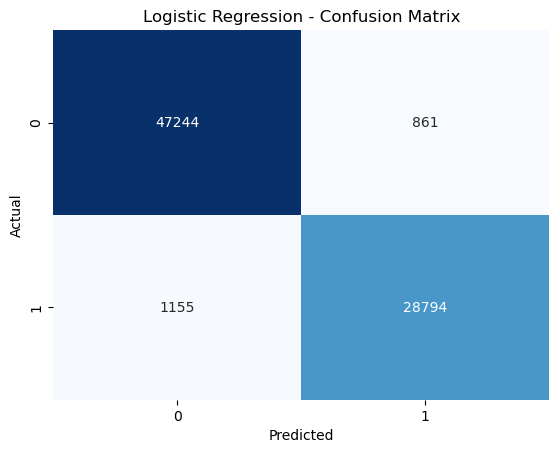


Logistic Regression Metrics:
Accuracy: 0.9742
Precision: 0.9742
Recall: 0.9742
F1-Score: 0.9741


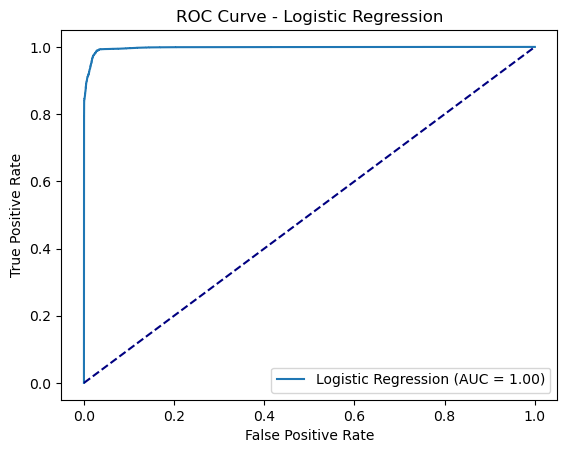


SVM - Confusion Matrix:


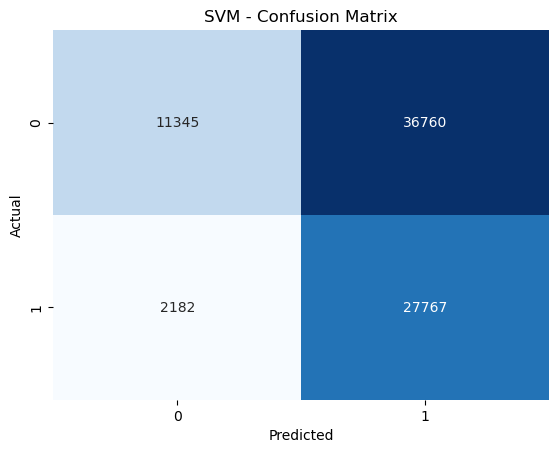


SVM Metrics:
Accuracy: 0.5011
Precision: 0.6820
Recall: 0.5011
F1-Score: 0.4524


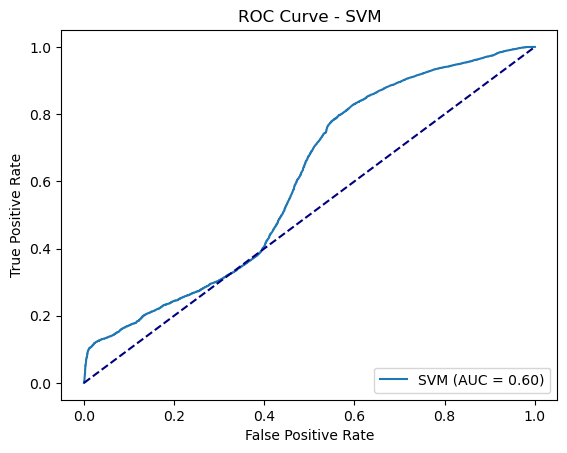


Decision Tree - Confusion Matrix:


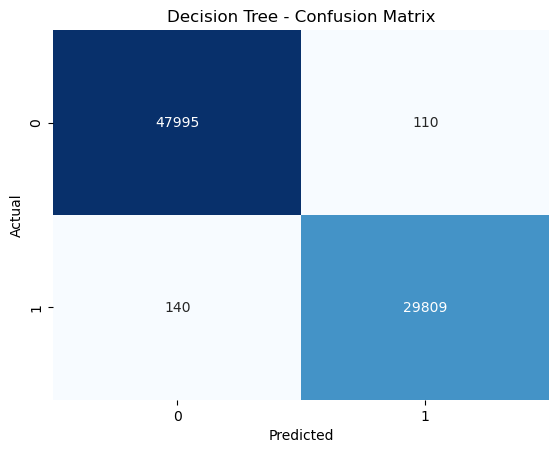


Decision Tree Metrics:
Accuracy: 0.9968
Precision: 0.9968
Recall: 0.9968
F1-Score: 0.9968


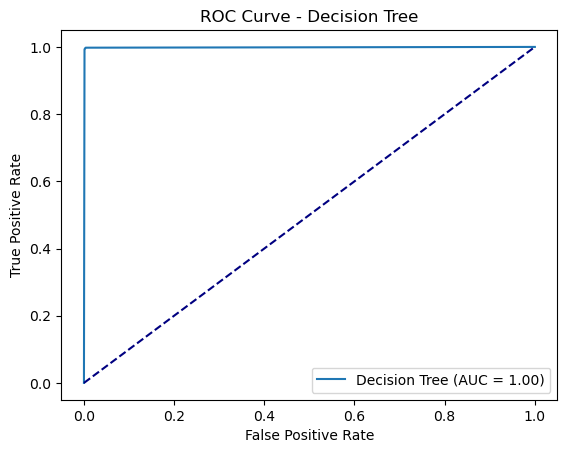


Random Forest - Confusion Matrix:


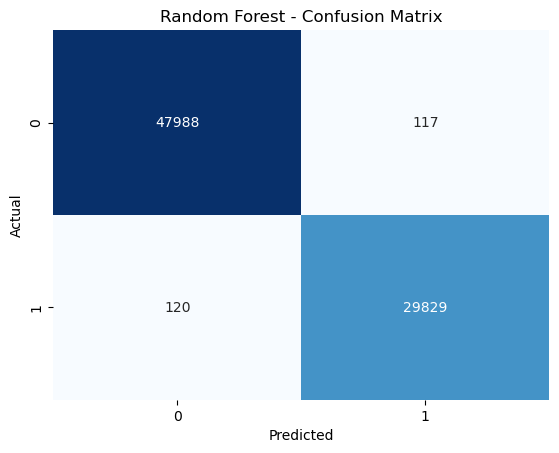


Random Forest Metrics:
Accuracy: 0.9970
Precision: 0.9970
Recall: 0.9970
F1-Score: 0.9970


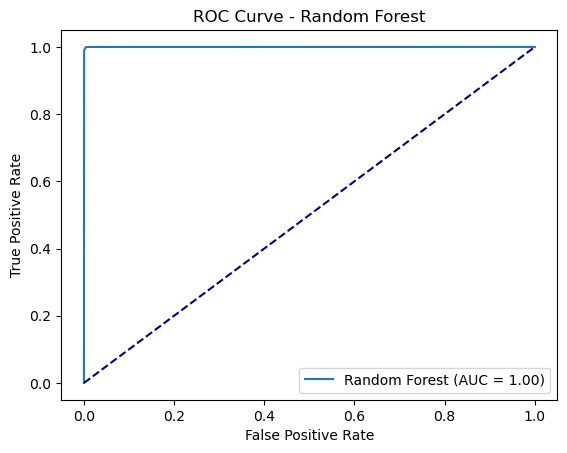


Naive Bayes - Confusion Matrix:


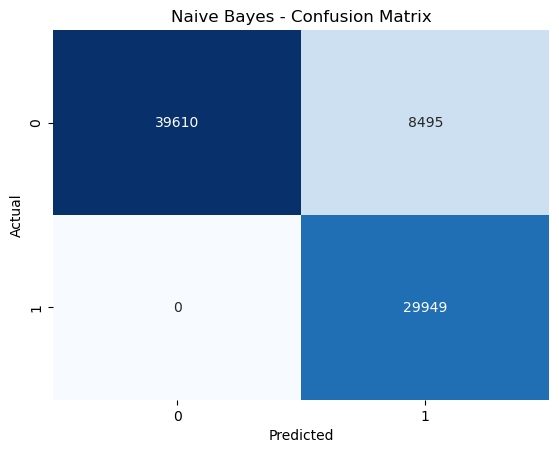


Naive Bayes Metrics:
Accuracy: 0.8912
Precision: 0.9152
Recall: 0.8912
F1-Score: 0.8927


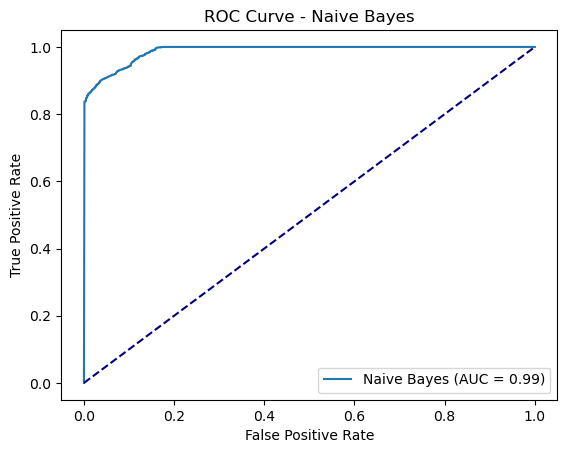


The best model is: Random Forest with an accuracy of 0.9970


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Function to plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Reduced dataset size for faster testing (e.g., 30% sample of the data)
X_sample, _, y_sample, _ = train_test_split(X1, y, test_size=0.7, random_state=42)

# List of models to implement
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),  # Reduced max_iter for faster convergence
    "SVM": SVC(probability=True, max_iter=1000),  
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1),  # Reduced n_estimators and use parallel processing
    "Naive Bayes": GaussianNB()
}

# Variables to store the best model details
best_model_name = None
best_model_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    # Train-test split for this model (used sample dataset for faster runs)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Confusion Matrix
    print(f"\n{model_name} - Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Print metrics
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # ROC Curve and AUC Score (only for models with probability estimates)
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend(loc="lower right")
        plt.show()

    # Update the best model based on accuracy
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = model_name

# Print the best model's name and its accuracy
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


Based on the evaluation metrics, the Random Forest classifier gives the highest test accuracy (0.9969)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a model on the balanced data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predict on train and test sets
train_preds = model.predict(X_train_balanced)
test_preds = model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train_balanced, train_preds)
test_acc = accuracy_score(y_test, test_preds)

# Print train and test accuracy to compare
print(f"Training Accuracy (Balanced Data): {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Check for overfitting: Large gap between train and test accuracy means overfitting
if train_acc - test_acc > 0.05:
    print("Overfitting detected!")
else:
    print("No significant overfitting.")


Training Accuracy (Balanced Data): 0.9988
Test Accuracy: 0.9971
No significant overfitting.


## Hyperparameter Tuning

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized search for best hyperparameters
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the tuned model
best_model = random_search.best_estimator_
test_preds = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f"Test Accuracy with Tuned Model: {test_acc:.4f}")


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Test Accuracy with Tuned Model: 0.9971


* **Model Selected :  Random Forest**
* The refined Random Forest models, particularly Random Forest, exhibited a better balance between training and testing performance, reducing overfitting while maintaining reasonable accuracy.

## Save Model

In [95]:
import joblib

In [96]:
model_filename = 'Energy_prediction.pkl'
joblib.dump(best_model, model_filename)

['Energy_prediction.pkl']

In [97]:
loaded_model = joblib.load(model_filename)

In [98]:
loaded_model

RandomForestClassifier(bootstrap=False, max_depth=30, random_state=42)

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define numerical features from your dataset
numerical_features = [ 'value', 'number_of_accounts']

# Example unseen data with specific values for prediction
unseen_data = pd.DataFrame({
    'value': [5000.0], 
    'com_name': ['Sodus'],  
    'com_type': ['Village'],  
    'data_field': ['all_other_(o)'], 
    'com_county': ['Wayne'],
    'unit': ['MWh'], 
    'number_of_accounts': [50], 
    'Georeference': ['POINT (-77.061462 43.236085)']  
})


# Encoding Data
unseen_data_encoded = pd.get_dummies(unseen_data, columns=[ 'com_type', 'unit', ], drop_first=True)

for col in ['com_name', 'Georeference', 'com_county', 'data_field']:
    freq_encoding = X[col].value_counts(normalize=True)  
    unseen_data_encoded[col] = X[col].map(freq_encoding)  


# Ensure unseen_data has the same columns as the training data (handled missing columns if needed)
unseen_data_encoded = unseen_data_encoded.reindex(columns=X_train.columns, fill_value=0)

#Scale numerical features
scaler = StandardScaler()
unseen_data_encoded[numerical_features] = scaler.fit_transform(unseen_data_encoded[numerical_features])

# Predict using the pre-trained Random Forest model
predicted_class = loaded_model.predict(unseen_data_encoded)

print("Predicted class:", predicted_class[0])


Predicted class: 0


## Conclusion:
**Model Selected: Random Forest Classifier**

The Random Forest model was identified as the best-performing model. It demonstrated a strong balance between training and test performance, showing robustness without significant overfitting. The model effectively captured the complex patterns in the dataset and maintained high accuracy across various classes. Despite the presence of missing data and potential class imbalance, the model performed well overall, making it a reliable choice for classification tasks in this dataset. Further improvements could be made by addressing limitations such as class imbalance and enhancing feature engineering.

## Future Work:
* **Address Imbalanced Data:** Implement resampling techniques such as SMOTE or class weighting to handle class imbalance and improve prediction for minority classes.

* **Incorporate Time Series Analysis:** Explore time-series models or include temporal features (e.g., lag features, rolling statistics) to better capture seasonal trends and patterns in the data.

* **Enhance Feature Engineering:** Introduce new features such as seasonal indicators or interactions between variables to improve the model’s predictive power.

* **Experiment with Ensemble Methods:** Consider using stacking, boosting (e.g., XGBoost or LightGBM), or hybrid models to potentially improve overall model performance.

* **Update Model with New Data:** Periodically retrain the model with new data to keep it up to date and maintain performance as new trends emerge.

* **Explore Explainability Tools:** Use SHAP or LIME to provide interpretability, helping to understand the model’s decisions and gaining trust from stakeholders.